# Хакатон-Лента

Содержание:

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, получение общей информации.](#Section_1_1)
* [2. Краткие выводы по имебщимся данным](#Section_1_2)

***Часть 2.Предварительная обработка данных:***
* [1. Поиск аномалий в данных](#Section_2_1)
* [2. Проверка на явные дубликаты](#Section_2_2)
* [3. Краткие выводы по разделу](#Section_2_3)

***Часть 3.EDA:***
* [1. Анализ числовых переменных](#Section_3_1)
* [2. Матрицы корреляции и двухмерное отображение данных](#Section_3_2)
* [3. Анализ на нормальное распределение](#Section_3_3)
* [4. Анализ категориальных признаков](#Section_3_4)

***Часть 4.Формирование новых признаков***
* [1. Признаки даты](#Section_4_1)
* [2. Топ продаваемых товаров](#Section_4_2)
* [3. Оборачиваемость магазина](#Section_4_3)
* [4. Кластеризация товаров (иеарх. анализ(](#Section_4_4)
* [4. Кластеризация магазинов](#Section_4_5)
***Часть 5.Анализ группировки вокруг магазинов/товаров/кластеров***
***Часть 6.Кластеризация временных рядов***
* [1. Формирование датасета - товар/магазин](#Section_6_1)
* [2. Кластеризация временных рядов методом kmeans](#Section_6_2)
* [3. Формирование признаков в разрезе кластера: скользящее среднее и сдвиги (до 28 дня). Формирование тренда и сезонности в разрезе кластера.](#Section_6_3)

***Часть 7. Формирование фич для наборов данных***
* [1. Формирование  обучающего датасета](#Section_7_1)
* [2. Формирование  тестовго датасета](#Section_7_2)
***Часть 8. Обучение моделей***
* [1. CatBoostRegressor](#Section_8_1)
* [2. LGBMRegressor](#Section_8_2)
***Часть 9. Обучение моделей для предсказания каждого дня***
[Обучение моделей для предсказания каждого дня](#Section_9_1)
***Часть 10. Подготовка итоговых предсказаний***
[ Подготовка итоговых предсказаний](#Section_10_1)
***Часть 11. Результаты работы***
[Результаты работы](#Section_11_1)

**Цель:**

Разработка модели, прогнозирующей спрос на 14 дней для товаров собственного
производства. Гранулярность ТК-SKU-День.
_____

Построить модель прогноза спроса на основе **мастер данных** и данных продаж с учетом разных
признаков.
_____
**Задачи:**

- Сгенерировать различные интерпретируемые признаки.
- Необходимо сделать подневной прогноз спроса на тестовом периоде для каждого товара и магазина, и команда Ленты оценит его качество в сравнении с свершившимся фактом.
_____
**Метрика:**
Метрикой качества - WAPE, посчитанный на уровне товар, магазин, день.
Если есть пропущенные значения и по каким-то товарам не предоставлен прогноз, прогноз считается равным нулю.
_____
**Результат:**

Результат содержит:
1. Файл в зафиксированном формате с результатом прогноза спроса(sales_submission.csv).
2. Воспроизводимый код на Python
3. Описание решения:
a. Описание модели прогноза спроса, которую вы зафитили
i. Признаки
ii. интерпретация (shapley values),
iii. кросс-валидация
iv. алгоритмы
b. Описание вашего алгоритма оптимизации:
i. методология расчетов
ii. скорость оптимизации

Критерии оценки:
У вас есть тестовый датасет за более поздние периоды в рамках групп товаров собственного производства. Ваш алгоритм должен показать высокую точность прогнозирования спроса с использованием признаков, которые вы сочтёте нужными.
Критерии оценки – WAPE + алгоритм прогноза спроса является понятным, эффективным и масштабируемым.


**1) sales_df_train.csv –данные по продажам за скользящий год для обучения.**
Столбцы:
- st_id – захэшированное id магазина;
- pr_sku_id – захэшированное id товара;
- date – дата;
- pr_sales_type_id – флаг наличия промо;
- pr_sales_in_units – число проданных товаров без признака промо;
- pr_promo_sales_in_units – число проданных товаров с признаком промо;
- pr_sales_in_rub – продажи без признака промо в РУБ;
- pr_promo_sales_in_rub – продажи с признаком промо в РУБ;

**2) pr_df.csv – данные по товарной иерархии.**

От большего к меньшему pr_group_id - pr_cat_id - pr_subcat_id - pr_sku_id.
Столбцы:
- pr_group_id – захэшированная группа товара;
- pr_cat_id – захэшированная категория товара;
- pr_subcat_id – захэшированная подкатегория товара;
- pr_sku_id – захэшированное id товара;
- pr_uom_id (маркер, обозначающий продаётся товар на вес или в ШТ).

**3) pr_st.csv – данные по магазинам.**

Столбцы:
- st_id – захэшированное id магазина;
- st_city_id – захэшированное id города;
- st_division_code id – захэшированное id дивизиона;
-st_type_format_id – id формата магазина;
-st_type_loc_id – id тип локации/окружения магазина;
-st_type_size_id – id типа размера магазина;
-st_is_active – флаг активного магазина на данный момент.

**4) sales_submission.csv – пример файла с результатом работы модели прогноза спроса.**

Необходимо подготовить файл в таком же формате, заполнив колонку target предсказаниями (по
умолчанию колонка заполнена нулями).
Столбцы:
- st_id – захэшированное id магазина;
- pr_sku_id – захэшированное id товара;
- date – дата (день);
- target – спрос в ШТ

## Подключение библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from statsmodels.tsa.seasonal import seasonal_decompose

import time
from tqdm.autonotebook import tqdm

import seaborn as sns

from lightgbm import LGBMRegressor
import lightgbm
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    make_scorer)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from catboost import CatBoostRegressor
from datetime import datetime, timedelta

## Функции

In [2]:
# Группируем товары по группе (пункт 3.4.2)
def pr_group_id_group(x):
    if x in [1,5,7,8]:
        y = 1
    else:
        y = x

    return y

In [3]:
# Группируем данные по данным о магазинах( общая групировка) (пункт 3.4.1)
def st_group_(x, st_group):
    y = x.copy()
    y['st_group'] = x['st_division_code'].copy()
    for i in range(len(st_group)):
          index = y[ (y['st_id_group'] == st_group.index[i][0]) & (y['st_city_id_group'] == st_group.index[i][1]) & (y['st_division_id_group'] == st_group.index[i][2])].index
          y.loc[y.index.isin(index), 'st_group'] = i
    return y

In [4]:
# Группируем магазины по городу (пункт 3.4.1)
def st_division_id_group(x):

    if x in [1,2]:
      y = 0
    elif x in [0,3]:
      y = 1
    else:
      y= 2
    return y


In [5]:
# Вывод базовой информации о данных (пункт 1.1)
def data_info_first(data):
  print('Пропуски в данных')
  print(data.isnull().sum())
  print('\n Информация о данных столбцов')
  print(data.info())
  for i in data.columns:
    u = len(data[i].unique())
    print(f'Иникальных значений в {i} = {u}')
  return

In [6]:
# Группируем магазины по городу (пункт 3.4.1)
def st_city_id_group(x):

    if x in [1,4]:
      y = 0
    elif x in [0,2,5]:
      y = 1
    else:
      y= 2
    return y


In [7]:
# Группируем магазины (пункт 3.4.1)
def st_id_group(x):

    if x in [2,3,5,9]:
      y = 0
    elif x in [1,8]:
      y = 1
    else:
      y= 2
    return y


In [8]:
# Оптимизация метода kmeans
def Kmeans_K(data, k_start, k_end,k_step):
    sil = []
    db = []
    j = []
    for i in range(k_start, k_end,k_step):
      model = KMeans(n_clusters=i, random_state=1234)
      data_ = data.copy()
      model.fit(data_)
      labels = model.labels_
      s = metrics.silhouette_score(data_, labels, metric='euclidean')
      d = metrics.davies_bouldin_score(data_, labels)
      sil.append(s)
      db.append(d)
      j.append(i)
    pylab.subplot (1, 2, 2)
    pylab.plot (j, sil,  label="silhouette->1")
    pylab.plot (j, db,  label="davies_bouldin->0")
    pylab.title ("Метрики кластеризации")
    pylab.legend()
    pylab.show()
    return sil, db

In [9]:
# Обучим модель с конкретным значением кластеров и получим метки кластера
def kmeans_k_known(data, k):
    modelKMEANS = KMeans(n_clusters=k, random_state=1234)
    modelKMEANS.fit(data)
    labels = modelKMEANS.labels_
    kmeans_center = modelKMEANS.cluster_centers_
    s_kmeans = metrics.silhouette_score(data, labels, metric='euclidean')
    d_kmeans = metrics.davies_bouldin_score(data, labels)
    #print('Кластеры: количестов элементов', np.unique (labels, return_counts= True ) )
    return labels, s_kmeans, d_kmeans, kmeans_center

In [10]:
# Преобразование float - int если это возможно
def is_it_int(data_):
  data = data_.copy()
  num_features = data.select_dtypes(exclude=['object', 'int']).columns.to_list()
  for column in num_features:
    k=0
    i = 0
    while ((i in range(len(data[column]))) & (k ==0)):
      if not(data.loc[i, column].is_integer()):
        k = 100
      i +=1
    if k == 100:
      print('Содержит числа с плавающей точкой, нельзя преобразовать в int')
      return data
    else:
      print(f'Можно преобразовать в int столбец {column}')
      data[column] = data[column].astype('int')
      return data

In [11]:
# Оптимизация иеархического кластерного анализа
def hierarchy(data, xmax):
    link = linkage(data, 'ward', 'euclidean')
    #dn = dendrogram(link)
    dist = link[:, 2]
    dist_rev = dist[::-1]
    idxs = range(1, len(dist) + 1)
    plt.plot(idxs, dist_rev, marker='o')
    plt.title('Расстояние между кластерами')
    plt.xlabel('Шаг')
    plt.ylabel('Расстояние')
    plt.xlim([0, xmax])


    return link

In [12]:
# метрика для оценки работы модели
def wape(y_true: np.array, y_pred: np.array):
    return np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true))

In [13]:
# формируем временные ряды для среза магазин-товар
def  ts_st_sku(sales_df_train):
    st_id_unique = sales_df_train['st_id'].unique()
    sales_df_train['date'] = pd.to_datetime(sales_df_train['date'])
    #sales_df_train_2 = sales_df_train[sales_df_train['pr_sales_type_id'] ==0].copy()
    sales_df_train_2 = sales_df_train.copy()

    # смотрим на качество
    #sales_df_train_2 = sales_df_train_2[sales_df_train_2['pr_sales_type_id'] == 0]


    sales_df_train_2 =sales_df_train_2[['st_id', 'pr_sku_id','date',  'pr_sales_in_units']]


    TimeSeries_df = pd.DataFrame( )
    data_time_series = []
    for i in st_id_unique:
        data = sales_df_train_2[sales_df_train_2['st_id'] ==i].copy()
        pr_sku_id_unique = data['pr_sku_id'].unique()
        for j in pr_sku_id_unique:
          data1 = data[data['pr_sku_id'] == j].copy()
          data1 = data1[['date', 'pr_sales_in_units']]
          data1.index =data1['date']
          data1.index = data1.index.copy()
          data1 = data1.resample('1D').first()
          data1 = data1.drop(columns = 'date', axis = 1)
          data2 = data1.T
          data2['st_id'] = i
          data2['pr_sku_id'] = j
          columns_df = data2.columns
          data2.index = data2['st_id'] + data2['pr_sku_id']
          data_time_series.append(data2)
          #TimeSeries_df = TimeSeries_df.append(data2)
          #TimeSeries_df = TimeSeries_df.append(data_time_series[len(data_time_series)-1])

    TimeSeries_df = pd.DataFrame( columns = columns_df )
    for i in range(len(data_time_series)):
        TimeSeries_df = TimeSeries_df.append(data_time_series[i])
        #imeSeries_df = pd.DataFrame(data_time_series, columns = columns )
        TimeSeries_df = TimeSeries_df.fillna(0)

    return TimeSeries_df

In [14]:
# кластеризуем ряды
def Kmeans_ts(TimeSeries_df, k, metric_):
    TimeSeries_df.columns =TimeSeries_df.columns.astype('str')
    st_id = TimeSeries_df['st_id']
    pr_sku_id = TimeSeries_df['pr_sku_id']
    TimeSeries_df = TimeSeries_df.drop(columns = ['st_id','pr_sku_id' ], axis = 1)
    scaler = StandardScaler()
    tickers_scaled = scaler.fit_transform(TimeSeries_df)
    distortions = []
    silhouette = []
    K = range(1, k)
    for k in tqdm(K):
        kmeanModel = TimeSeriesKMeans(n_clusters=k, metric=metric_, n_jobs=6, max_iter=10, random_state = 1234)
        kmeanModel.fit(tickers_scaled)
        distortions.append(kmeanModel.inertia_)
        if k > 1:
            silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_))

    plt.figure(figsize=(10,4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(K[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette')
    plt.show()
    return tickers_scaled

In [15]:
# для выбронного количества кластеров обучаем kmeans
def kmeans_st_pred(TimeSeries_df, k, metric_):
    n_clusters = k
    scaler = StandardScaler()
    TimeSeries_df = TimeSeries_df.drop(columns = ['st_id','pr_sku_id' ], axis = 1)
    tickers_scaled = scaler.fit_transform(TimeSeries_df)
    ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric_, n_jobs=3, max_iter=10, random_state = 1234)
    ts_kmeans.fit(tickers_scaled)
    TimeSeries_df_2 = TimeSeries_df.copy()
    TimeSeries_df['cluster'] = ts_kmeans.predict(tickers_scaled)
    #st_id = TimeSeries_df['st_id'].unique()
    #pr_sku_id = TimeSeries_df['pr_sku_id'].unique()
    data_cluster = pd.DataFrame(index = TimeSeries_df.index)
    data_cluster['cluster'] = ts_kmeans.predict(tickers_scaled)
    return data_cluster,ts_kmeans.cluster_centers_

In [16]:
# Формируем признаки даты: год, месяц, неделя, день (пункт 4.1)
def year_month_week(data):
    data['year'] = pd.to_datetime(data['date'], utc=True).dt.year
    data['month'] = pd.to_datetime(data['date'], utc=True).dt.month
    data['week'] = pd.to_datetime(data['date'], utc=True).dt.dayofweek
    data['day'] = pd.to_datetime(data['date'], utc=True).dt.day

    return data

In [17]:
# присваиваем номер кластера
def give_cluster_ts(x):
    #data_cluster = kmeans_st_pred(tickers_scaled, 6)
    try:
       cluster = list(data_cluster.loc[data_cluster.index == x, 'cluster'])[0]
    except:
       cluster = -1
    return cluster

In [18]:
# топ товаров и магазинов
def likvid(train):
  top_pr_sku_id = train.groupby(['pr_sku_id'])['date'].nunique().sort_values(ascending =False)
  top_st_revenue = train.groupby('st_id')['pr_sales_in_units'].sum().sort_values(ascending = False)
  return top_pr_sku_id, top_st_revenue

In [19]:
# формируем сдвиг и среднее
'''
def make_features(data):
    max_lag = 30
    rolling_mean_size = 30
    data = data.drop(columns = ['st_id', 'pr_sku_id'])
    data = data.T
    column = data.columns
    data.index = pd.to_datetime(data.index)
    data_new = pd.DataFrame(data, columns =column)

    for lag in range(1, max_lag + 1):
        data_new['lag_{}'.format(lag)] = data_new[column].shift(lag)

    data_new['rolling_mean'] = data_new[column].rolling(rolling_mean_size, closed = 'left').mean()
    data_new['st_id_pr_sku_id'] = column[0]
    return data_new
    '''

"\ndef make_features(data):\n    max_lag = 30\n    rolling_mean_size = 30\n    data = data.drop(columns = ['st_id', 'pr_sku_id'])\n    data = data.T\n    column = data.columns\n    data.index = pd.to_datetime(data.index)\n    data_new = pd.DataFrame(data, columns =column)\n\n    for lag in range(1, max_lag + 1):\n        data_new['lag_{}'.format(lag)] = data_new[column].shift(lag)\n\n    data_new['rolling_mean'] = data_new[column].rolling(rolling_mean_size, closed = 'left').mean()\n    data_new['st_id_pr_sku_id'] = column[0]\n    return data_new\n    "

In [20]:
# формируем сдвиг и среднее в разрезе товар магазин
'''
def lag_mean(sales_df_train1, TimeSeries_df):
    #sales_df_train1 = sales_df_train.copy()
    #sales_df_train1['date'] = pd.to_datetime(sales_df_train1['date'] )
    #sales_df_train1['st_id_pr_sku_id'] = sales_df_train1['st_id']+sales_df_train1['pr_sku_id']



    max_lag = 30
    for lag in range(1, max_lag+1 ):
      sales_df_train1['lag_{}'.format(lag)] = np.nan
    sales_df_train1['rolling_mean'] = np.nan

    for i in range(len(sales_df_train1)):
        data = make_features(TimeSeries_df[TimeSeries_df.index == sales_df_train1.iloc[i]['st_id_pr_sku_id']])
        sales_df_train1.at[i, 'rolling_mean'] =data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['rolling_mean']
        for lag in range(1, max_lag + 1):
            sales_df_train1.at[i, 'lag_{}'.format(lag)] = data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['lag_{}'.format(lag)]

    return sales_df_train1
    '''

"\ndef lag_mean(sales_df_train1, TimeSeries_df):\n    #sales_df_train1 = sales_df_train.copy()\n    #sales_df_train1['date'] = pd.to_datetime(sales_df_train1['date'] )\n    #sales_df_train1['st_id_pr_sku_id'] = sales_df_train1['st_id']+sales_df_train1['pr_sku_id']\n\n\n\n    max_lag = 30\n    for lag in range(1, max_lag+1 ):\n      sales_df_train1['lag_{}'.format(lag)] = np.nan\n    sales_df_train1['rolling_mean'] = np.nan\n\n    for i in range(len(sales_df_train1)):\n        data = make_features(TimeSeries_df[TimeSeries_df.index == sales_df_train1.iloc[i]['st_id_pr_sku_id']])\n        sales_df_train1.at[i, 'rolling_mean'] =data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['rolling_mean']\n        for lag in range(1, max_lag + 1):\n            sales_df_train1.at[i, 'lag_{}'.format(lag)] = data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['lag_{}'.format(lag)]\n\n    return sales_df_train1\n    "

In [21]:
# формируем сдвиг и среднее в разрезе товар магазин
'''
def lag_mean_3(sales_df_train1):
    sales_df_train1 = sales_df_train.copy()



    max_lag = 30
    #for lag in range(1, max_lag+1 ):
     # sales_df_train1['lag_{}'.format(lag)] = np.nan
    sales_df_train1['rolling_mean'] = np.nan

    for i in range(len(sales_df_train1)):
        data = make_features(TimeSeries_df[TimeSeries_df.index == sales_df_train1.iloc[i]['st_id_pr_sku_id']])
        sales_df_train1.at[i, 'rolling_mean'] =data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['rolling_mean']
        #for lag in range(1, max_lag + 1):
         #   sales_df_train1.at[i, 'lag_{}'.format(lag)] = data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['lag_{}'.format(lag)]

    return sales_df_train1['rolling_mean']
    '''

"\ndef lag_mean_3(sales_df_train1):\n    sales_df_train1 = sales_df_train.copy()\n\n\n\n    max_lag = 30\n    #for lag in range(1, max_lag+1 ):\n     # sales_df_train1['lag_{}'.format(lag)] = np.nan\n    sales_df_train1['rolling_mean'] = np.nan\n\n    for i in range(len(sales_df_train1)):\n        data = make_features(TimeSeries_df[TimeSeries_df.index == sales_df_train1.iloc[i]['st_id_pr_sku_id']])\n        sales_df_train1.at[i, 'rolling_mean'] =data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['rolling_mean']\n        #for lag in range(1, max_lag + 1):\n         #   sales_df_train1.at[i, 'lag_{}'.format(lag)] = data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['lag_{}'.format(lag)]\n\n    return sales_df_train1['rolling_mean']\n    "

In [22]:
# формируем сдвиг и среднее в разрезе товар магазин
'''
def lag_mean_2(sales_df_train1, TimeSeries_df):
    #sales_df_train1 = sales_df_train.copy()
    #sales_df_train1['date'] = pd.to_datetime(sales_df_train1['date'] )
    #sales_df_train1['st_id_pr_sku_id'] = sales_df_train1['st_id']+sales_df_train1['pr_sku_id']



    max_lag = 28
    for lag in range(1, max_lag+1 ):
      sales_df_train1['lag_{}'.format(lag)] = np.nan
    sales_df_train1['rolling_mean'] = np.nan

    for i in sales_df_train1:
        data = make_features(TimeSeries_df[TimeSeries_df.index == i['st_id_pr_sku_id']])
        i['rolling_mean'] =data.loc[(i['date'] == data.index)]['rolling_mean']
        #for lag in range(1, max_lag + 1):
         #   sales_df_train1.at[i, 'lag_{}'.format(lag)] = data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['lag_{}'.format(lag)]

    return sales_df_train1
    '''

"\ndef lag_mean_2(sales_df_train1, TimeSeries_df):\n    #sales_df_train1 = sales_df_train.copy()\n    #sales_df_train1['date'] = pd.to_datetime(sales_df_train1['date'] )\n    #sales_df_train1['st_id_pr_sku_id'] = sales_df_train1['st_id']+sales_df_train1['pr_sku_id']\n\n\n\n    max_lag = 28\n    for lag in range(1, max_lag+1 ):\n      sales_df_train1['lag_{}'.format(lag)] = np.nan\n    sales_df_train1['rolling_mean'] = np.nan\n\n    for i in sales_df_train1:\n        data = make_features(TimeSeries_df[TimeSeries_df.index == i['st_id_pr_sku_id']])\n        i['rolling_mean'] =data.loc[(i['date'] == data.index)]['rolling_mean']\n        #for lag in range(1, max_lag + 1):\n         #   sales_df_train1.at[i, 'lag_{}'.format(lag)] = data.loc[(sales_df_train1.iloc[i]['date'] == data.index)]['lag_{}'.format(lag)]\n\n    return sales_df_train1\n    "

In [23]:
# формируем сдвиг и среднее
def make_features(data_):
    max_lag = 28
    rolling_mean_size = 28
    data = data_.copy()

    # проверка качества
    #data = data[data['pr_sales_type_id'] == 0]

    data = data.groupby('date')['pr_sales_in_units'].mean()

    data.sort_index(inplace=True)
    data = data.resample('1D').median()
    data = data.fillna(0)
    #data.index = pd.to_datetime(data.index)

    decomposed = seasonal_decompose(data)


    data_new = pd.DataFrame(data)

    for lag in range(1, max_lag + 1):
        data_new['lag_{}'.format(lag)] = data.shift(lag)
        #data_new['lag_{}'.format(lag)] = is_it_int_2(data_new['lag_{}'.format(lag)])

    data_new['rolling_mean'] = data.rolling(rolling_mean_size, closed = 'left').mean()
    data_new['trend']  =  decomposed.trend
    data_new['seasonal']  = decomposed.seasonal
    data_new = data_new.fillna(0)
    #data_new = is_it_int(data_new)
    return data_new

In [24]:
'''
# Преобразование float - int если это возможно
def is_it_int_2(data_):
    data = data_.copy()
    k=0
    i = 0
    while ((i in range(len(data))) & (k ==0)):
        if not(data[i].is_integer()):
            k = 100
        i +=1

    if k == 100:
        return data
    else:
        data = data.astype('int')
        return data
'''

"\n# Преобразование float - int если это возможно\ndef is_it_int_2(data_):\n    data = data_.copy()\n    k=0\n    i = 0\n    while ((i in range(len(data))) & (k ==0)):\n        if not(data[i].is_integer()):\n            k = 100\n        i +=1\n\n    if k == 100:\n        return data\n    else:\n        data = data.astype('int')\n        return data\n"

In [25]:
def mada_log(sales_df_train_10):
    sales_df_train_20 = sales_df_train_10.copy()
    data_all = []
    cluster_st = sales_df_train_20['cluster_st'].unique()

    for i in cluster_st:
        data = sales_df_train_20[sales_df_train_20['cluster_st'] == i]
        data_new = make_features(data)
        data_new = data_new.drop(columns = ['pr_sales_in_units'])
        #columns = data_new.columns

        sales_df_train_21 = pd.merge(data,  data_new, how='left', left_on='date', right_on='date')
        data_all.append(sales_df_train_21)

    columns_df =  data_all[0].columns
    data_all_df = pd.DataFrame( columns = columns_df )
    for i in range(len(cluster_st)):
            data_all_df = data_all_df.append(data_all[i])
            data_all_df = data_all_df.fillna(0)

    return data_all_df


In [26]:
# определяем фичи для трейна
def make_features_train(train,k, metric_, holidays_covid_calendar):
  train_ = train.copy()
  sales_df_train_neg_sales = sales_df_train[(sales_df_train['pr_sales_in_units'] <= 0) |
                           (sales_df_train['pr_sales_in_rub'] <= 0)]
  train_ = train_[~(train_.index.isin(sales_df_train_neg_sales.index))]
  train_ = train_.drop(columns = ['pr_promo_sales_in_units',	'pr_promo_sales_in_rub'], axis = 1)
  TimeSeries_df = ts_st_sku(train_)
  data_cluster, centers = kmeans_st_pred(TimeSeries_df, k, metric_)

  train_['date'] = pd.to_datetime(train_['date'])
  train_['st_id_pr_sku_id'] = train_['st_id']+train_['pr_sku_id']
  train_['cluster_st'] = train_['st_id_pr_sku_id'].apply(give_cluster_ts)

  # Вытащим день недели, год, месяц, день
  train_ = year_month_week(train_)
  #Добавим маркер праздника
  holidays_covid_calendar['date'] = pd.to_datetime(holidays_covid_calendar['date'])
  holidays_calendar = holidays_covid_calendar[holidays_covid_calendar['holiday'] ==1]
  train_['holiday'] = 0
  train_.loc[train_['date'].isin(list(holidays_calendar['date'])), 'holiday'] = 1
  # ликвидность
  top_pr_sku_id, top_st_revenue= likvid(train_)
  train_['liquidity'] = 0
  train_.loc[train_['pr_sku_id'].isin(list((top_pr_sku_id>350).index)), 'liquidity'] = 2
  train_.loc[train_['pr_sku_id'].isin(list((top_pr_sku_id>50).index)), 'liquidity'] = 1
  train_['top_st_revenue'] = 0
  train_.loc[train_['top_st_revenue'].isin(list((top_st_revenue>400000).index)), 'top_st_revenue'] = 2
  train_.loc[train_['top_st_revenue'].isin(list((top_st_revenue>100000).index)), 'top_st_revenue'] = 1
  train_ = mada_log(train_)
  #train_ = lag_mean_2(train_, TimeSeries_df)
  return train_, data_cluster


In [27]:
#функция для поиска лучшей модели
def find_best(type_model, CV,features_train, target_train, parameters, verb):
    tscv = TimeSeriesSplit(n_splits=CV)
    score_RMSE  = make_scorer(mean_absolute_error, greater_is_better=False)
    model = type_model()
    grid_search = GridSearchCV(model, parameters, cv = tscv, scoring = score_RMSE)
    if verb:
        grid_search.fit(features_train, target_train, verbose=100000)
    else:
        grid_search.fit(features_train, target_train)

    return grid_search

In [28]:
def model_result(model, features, columns):
    model_best = model.best_estimator_
    predict = model_best.predict(features)
    w =wape(target, predict)
    print('Лучший показатель wape = ',w)
    print('Параметры лучшей модели ', model.best_params_)
    hd = list(columns)
    columns_importance = []
    importance = []
    for i, f in zip(hd, model_best.feature_importances_):
        columns_importance.append(i)
        importance.append(round(f*100, 2))
    importance_model = pd.DataFrame([columns_importance, importance]).T
    print(importance_model.sort_values(1, ascending=False))
    return model_best, importance_model, w

In [29]:
# определяем фичи для тест
def make_features_test(test, data_cluster, holidays_covid_calendar, train_):
  test_ = test.copy()
  test_['date'] = pd.to_datetime(test_['date'])
  test_['st_id_pr_sku_id'] = test_['st_id']+test_['pr_sku_id']

  test_ = year_month_week(test_)
  #Добавим маркер праздника
  holidays_covid_calendar['date'] = pd.to_datetime(holidays_covid_calendar['date'])
  holidays_calendar = holidays_covid_calendar[holidays_covid_calendar['holiday'] ==1]
  test_['holiday'] = 0
  test_.loc[test_['date'].isin(list(holidays_calendar['date'])), 'holiday'] = 1
  # ликвидность
  top_pr_sku_id, top_st_revenue= likvid(train_)
  test_['liquidity'] = 0
  test_.loc[test_['pr_sku_id'].isin(list((top_pr_sku_id>350).index)), 'liquidity'] = 2
  test_.loc[test_['pr_sku_id'].isin(list((top_pr_sku_id>50).index)), 'liquidity'] = 1
  test_['top_st_revenue'] = 0
  test_.loc[test_['top_st_revenue'].isin(list((top_st_revenue>400000).index)), 'top_st_revenue'] = 2
  test_.loc[test_['top_st_revenue'].isin(list((top_st_revenue>100000).index)), 'top_st_revenue'] = 1


  # Формируем сдвиг по кластеру
  # метка для разделения обучающего и тестовго набора
  test_['split'] = 'test'

  # обучающий набор
  train_['st_id_pr_sku_id'] = train_['st_id'] + train_['pr_sku_id']
  train_['cluster_st'] = train_['st_id_pr_sku_id'].apply(give_cluster_ts)
  train_ = train_.drop(columns = ['pr_promo_sales_in_units',	'pr_promo_sales_in_rub'], axis = 1)
  train_['split'] = 'train'
  train_['true_sku'] = 0

  test_2 = test_[test_['pr_sku_id'].isin(train_['pr_sku_id'].unique())]
  # метка для выделения товаров, которых нет в обучающих данных
  test_2['true_sku'] = -1

  # товары, информации по которым не было в трейне
  test_3 =test_[~(test_['pr_sku_id'].isin(train_['pr_sku_id'].unique()))]
  # test_[~(test_['st_id_pr_sku_id'].isin(data_cluster.index))]
  #test_3['cluster_st'] = -1
  new_pr_sku_id = test_without_sku(test_3, pr_df, train_)

  test_3 = pd.merge(test_3, new_pr_sku_id, how = 'left', left_on = 'st_id_pr_sku_id', right_on='st_id_pr_sku_id')
  test_3['true_sku'] = test_3['true_sku'].fillna(0)
  test_3['new_sku'] = test_3['new_sku'].fillna(0)
  test_3['pr_sku_id'] = test_3.apply(lambda  x: x.pr_sku_id if x.new_sku == 0 else x.new_sku, axis=1)
  test_3['st_id_pr_sku_id'] =  test_3['st_id']+test_3['pr_sku_id']
  test_3 = test_3.drop(columns = ['new_sku'], axis = 1)



  test_2= test_2.append(test_3, ignore_index = True)
  test_2['cluster_st'] = test_2['st_id_pr_sku_id'].apply(give_cluster_ts)

  train_2 =train_.append(test_2)

  train_2['date'] = pd.to_datetime(train_2['date'])

  train_2 = mada_log(train_2)
  test_2_ = train_2[train_2['split'] == 'test']
  #test_2_ = train_2.iloc[len(test_2):].copy()




  #test_3 = test_3.fillna(0)


  test_2_ = test_2_.fillna(0)
  test_2_ = test_2_.drop(columns = 'split', axis = 1)
  return test_2_

In [30]:
def train_model_day(sales_df_train, st_df, pr_df,holidays_covid_calendar):
    # подготовка обучающего датасета
    train = pd.merge(sales_df_train, st_df, how='left', left_on='st_id', right_on='st_id')
    train_ = pd.merge(train, pr_df, how='left', left_on='pr_sku_id', right_on='pr_sku_id')
    train_, data_cluster = make_features_train(train_, 8, 'euclidean', holidays_covid_calendar)



     # разделение на таргет/фичу
    features = train_.drop(columns = ['pr_sales_in_units', 'pr_sales_in_rub',  'date',  'st_is_active'], axis = 1)
    target = train_['pr_sales_in_units']
    #  категориальные столбцы
    cat_features6 = features.select_dtypes(include='object').columns.to_list()+ ['cluster_st'] + ['year', 'month', 'week', 'day','holiday', 'liquidity', 'top_st_revenue']
    features[cat_features6] = features[cat_features6].astype('category')

    models_day = []
    wape_day = []

    for i in range(1, 15):
          day = train_['date'].max() + timedelta(days = i)

          #Каждая модель подавалась на гридсерч с кросс-валидацией 5 - лучшие параметры каждой модели learning_rate = 0.03, num_leaves =521, n_estimators =300
          model_day = LGBMRegressor(learning_rate = 0.03, num_leaves =521, n_estimators =300)

          features_day = features.copy()
          if i>1:
            for lag in range(1, i):
                    columns ='lag_{}'.format(lag)
                    features_day = features_day.drop(columns = columns, axis = 1)
          model_day.fit(features_day, target)
          predict = model_day.predict(features_day)
          w_day =wape(target, predict)
          models_day.append(model_day)
          wape_day.append(w_day)
          #filename = 'model_lgbm_{}.sav'.format(i)
          #model_day.booster_.save_model(filename)

    return models_day, wape_day, data_cluster

In [31]:
def test_without_sku(test_with_no_sku_, pr_df, train_):

    df_old_sku = test_with_no_sku_.groupby('st_id_pr_sku_id')['pr_sku_id', 'st_id'].agg('first')
    df_old_sku['st_id_pr_sku_id'] = df_old_sku.index
    df_old_sku = pd.merge(df_old_sku, pr_df, how='left', left_on='pr_sku_id', right_on='pr_sku_id')
    new_pr_sku_id = []
    for i, row in df_old_sku.iterrows():
        true_sku =row['pr_sku_id']
        sub = row['pr_subcat_id']
        cat = row['pr_cat_id']
        st =  row['st_id']
        group = row['pr_group_id']
        st_id_pr_sku_id = row['st_id_pr_sku_id']
        try:
            new_sku =  train_[(train_['st_id'] == st) & (train_['pr_subcat_id'] == sub)]['pr_sku_id'].value_counts().sort_values(ascending = False).index[0]
        except:
            try:
                new_sku =  train_[(train_['st_id'] == st) & (train_['pr_cat_id'] == cat)]['pr_sku_id'].value_counts().sort_values(ascending = False).index[0]
            except:
                new_sku =  train_[(train_['st_id'] == st) & (train_['pr_group_id'] == group)]['pr_sku_id'].value_counts().sort_values(ascending = False).index[0]
        new_pr_sku_id.append([true_sku,st_id_pr_sku_id,new_sku])



    new_pr_sku_id = pd.DataFrame(new_pr_sku_id, columns = ['true_sku', 'st_id_pr_sku_id', 'new_sku'])
    return new_pr_sku_id


In [32]:
def predict_days(model_best,data_cluster,sales_df_train,  sales_submission, st_df, pr_df,holidays_covid_calendar ):
    ## подготовка обучающего датасета
    train = pd.merge(sales_df_train, st_df, how='left', left_on='st_id', right_on='st_id')
    train['date'] = pd.to_datetime(train['date'])
    train_ = pd.merge(train, pr_df, how='left', left_on='pr_sku_id', right_on='pr_sku_id')
    #train_, data_cluster = make_features_train(train, 8, 'euclidean', holidays_covid_calendar)

    # подготовка тестовго датасета
    test_ = sales_submission.copy()
    test_.columns = test_.columns.str.replace('target', 'pr_sales_in_units')
    test_ = pd.merge(test_, st_df, how='left', left_on='st_id', right_on='st_id')
    test_ = pd.merge(test_, pr_df, how='left', left_on='pr_sku_id', right_on='pr_sku_id')
    test_ = make_features_test(test_, data_cluster, holidays_covid_calendar, train_)

    #  подготовка таблицы выходных данных
    sales_submission['date'] = pd.to_datetime(sales_submission['date'])

    #  категориальные столбцы

     # разделение на таргет/фичу
    #features = train_.drop(columns = ['pr_sales_in_units', 'pr_sales_in_rub',  'date',  'st_is_active'], axis = 1)
    #target = train_['pr_sales_in_units']
    #cat_features6 = features.select_dtypes(include='object').columns.to_list()+ ['cluster_st'] + ['year', 'month', 'week', 'day','holiday', 'liquidity', 'top_st_revenue']
    #features[cat_features6] = features[cat_features6].astype('category')



    features_test =  test_.drop(columns = ['pr_sales_in_units',  'date',  'st_is_active', 'true_sku',  'pr_sales_in_rub'], axis = 1)
    #features_test =features_test.drop(columns =['pr_group_id', 'pr_cat_id', 'pr_subcat_id',
    #   'pr_uom_id'])
    true_sku = test_['true_sku']
    cat_features6 = features_test.select_dtypes(include='object').columns.to_list()+ ['cluster_st'] + ['year', 'month', 'week', 'day','holiday', 'liquidity', 'top_st_revenue']
    target_test = test_['pr_sales_in_units']
    features_test[cat_features6] = features_test[cat_features6].astype('category')
    #print(features_test.columns)
    # подготовка таблицы выходных данных
    sales_columns = list(sales_submission.columns)
    sales_columns.append('true_sku')
    sales_submission_out = pd.DataFrame(columns = sales_columns)

    # перебор моделей
    columns = []
    for i in range(1, 15):
          model = model_best[i-1]
          day = train['date'].max() + timedelta(days = i)
          #features_day = features.copy()

          if i>1:
              for lag in range(1, i):
                      columns.append('lag_{}'.format(lag))
          #features_day = features_day.drop(columns = columns, axis = 1)
          features_test_day = features_test.drop(columns = columns, axis = 1)
          #print(features_test_day.columns)
          #model.fit(features_day, target)
          sales_submission_day = pd.DataFrame()
          features_test_day = features_test_day[test_['date'] == day]
          sales_submission_day['pr_sku_id'] = list(features_test_day['pr_sku_id'])
          sales_submission_day['st_id'] = list(features_test_day['st_id'])
          sales_submission_day['date'] = day
          true_sku_day = true_sku.loc[test_['date'] == day]
          sales_submission_day['target'] = model.predict(features_test_day)
          sales_submission_day['true_sku'] = list(true_sku_day)
          sales_submission_out = sales_submission_out.append(sales_submission_day)
    sales_submission_out['target'] = sales_submission_out['target'].round()
    sales_submission_out['target'] = sales_submission_out['target'].where(sales_submission_out['target']>0, 0)
    sales_submission_out['target'] = sales_submission_out['target'].astype('int')
    #sales_submission_out['true_sku'] = true_sku
    sales_submission_out['pr_sku_id'] = sales_submission_out.apply(lambda  x: x.pr_sku_id if x.true_sku == -1 else x.true_sku, axis=1)
    sales_submission_out = sales_submission_out.drop(columns = ['true_sku'])
    return sales_submission_out

In [33]:
def make_submission_file(sales_df_train):
    sales_submission_our = pd.DataFrame(columns = ['st_id', 'pr_sku_id', 'date', 'target'])
    train = sales_df_train.copy()
    train['st_id_pr_sku_id'] = train['st_id'] +  train['pr_sku_id']
    st_id_pr_sku_id =train.groupby('st_id_pr_sku_id')['st_id', 'pr_sku_id'].first()
    day_max =pd.to_datetime(train['date']).max()
    for i in range(1, 15):
      sales_submission_day = pd.DataFrame()
      sales_submission_day['st_id'] = st_id_pr_sku_id['st_id']
      sales_submission_day['pr_sku_id'] = st_id_pr_sku_id['pr_sku_id']
      sales_submission_day['date'] = [day_max + timedelta(days = i)]*len(st_id_pr_sku_id)
      sales_submission_day['target'] = 0
      sales_submission_our = sales_submission_our.append(sales_submission_day)
    sales_submission_our.reset_index(drop= True , inplace= True )
    return sales_submission_our


## Изучение общей информации

<a id='Section_1'></a>

### 1.1 Изученеие файлов с данными, получение общей информации

In [34]:
pr_df = pd.read_csv('data\\pr_df.csv')
sales_df_train = pd.read_csv('data\\sales_df_train.csv')
sales_submission = pd.read_csv('data\\sales_submission.csv')
st_df = pd.read_csv('data\\st_df.csv')
holidays_covid_calendar = pd.read_csv('data\\holidays_covid_calendar.csv')

#### 1.1.1 Изучение информации о товарной иерархии

In [35]:
pr_df.head(5)

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,fd064933250b0bfe4f926b867b0a5ec8,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
1,71c9661741caf40a92a32d1cc8206c04,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
2,00b72c2f01a1512cbb1d3f33319bac93,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,d407a3ebb4ab9b0d68b224486f8b8dad,17
3,9bc40cd2fe4f188f402bb41548c5e15c,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
4,3a74a370c8eb032acb11ad9119242b8f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17


In [36]:
data_info_first(pr_df)

Пропуски в данных
pr_sku_id       0
pr_group_id     0
pr_cat_id       0
pr_subcat_id    0
pr_uom_id       0
dtype: int64

 Информация о данных столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB
None
Иникальных значений в pr_sku_id = 2050
Иникальных значений в pr_group_id = 9
Иникальных значений в pr_cat_id = 43
Иникальных значений в pr_subcat_id = 170
Иникальных значений в pr_uom_id = 2


Все логично. Больше всего значений в id товара, дальше по уменьшению количества уникальных значений и укрупнению класса(товар-подкатегория-категория-группа).
Пропусков нет.
Столбец маркер (шт/на развес) - содержит также два значения.

#### 1.1.2 Изучение информации по продажам за скользящий год для обучения

In [37]:
sales_df_train.head(5)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0


In [38]:
data_info_first(sales_df_train)

Пропуски в данных
st_id                      0
pr_sku_id                  0
date                       0
pr_sales_type_id           0
pr_sales_in_units          0
pr_promo_sales_in_units    0
pr_sales_in_rub            0
pr_promo_sales_in_rub      0
dtype: int64

 Информация о данных столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory

Пропусков нет.
Всего 12 магазинов, 1991 товар. Есть тип данных float, посмотрим можем ли его превратить в int.

In [39]:
sales_df_train = is_it_int(sales_df_train)

Можно преобразовать в int столбец pr_sales_in_units


In [40]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  int32  
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 50.5+ MB


Преобразуем тип данных даты к datetime.

Максимальная дата покупок в данных 2023-07-18 00:00:00, минимальная - 2022-08-01 00:00:00


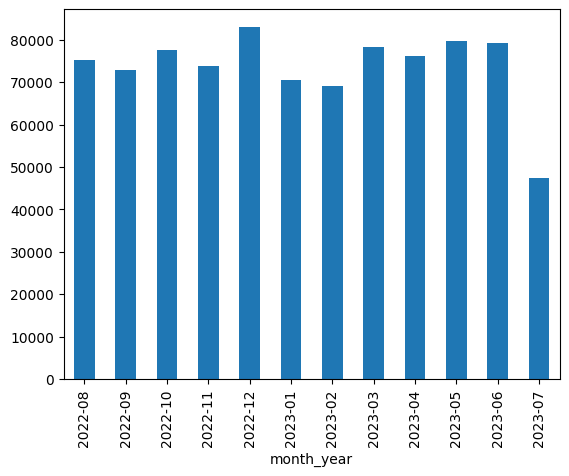

In [41]:
sales_df_train['date'] = pd.to_datetime(sales_df_train['date'])
max_date = sales_df_train['date'].max()
min_date = sales_df_train['date'].min()
print(f'Максимальная дата покупок в данных {max_date}, минимальная - {min_date}')
sales_df_train['month_year'] = sales_df_train['date'].dt.to_period('M')
year_month_sales= sales_df_train.groupby('month_year')['pr_sales_in_rub'].count()
year_month_sales =year_month_sales.sort_index()
year_month_sales.plot(kind = 'bar')
plt.show()

В целом количество данных за каждый месяц - равномерно.

#### 1.1.3 Изучение информации о магазинах

In [42]:
st_df.head(5)

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1


In [43]:
data_info_first(st_df)

Пропуски в данных
st_id                0
st_city_id           0
st_division_code     0
st_type_format_id    0
st_type_loc_id       0
st_type_size_id      0
st_is_active         0
dtype: int64

 Информация о данных столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 804.0+ bytes
None
Иникальных значений в st_id = 12
Иникальных значений в st_city_id = 7
Иникальных значений в st_division_code = 6
Иникальных значений в st_type_format_id = 3
Иникальных значений в st_type_loc_i

In [44]:
print('Метка/ количество в столбце st_is_active \n', st_df['st_is_active'].value_counts())

Метка/ количество в столбце st_is_active 
 st_is_active
1    10
0     2
Name: count, dtype: int64


2 магазина закрылись. Надо узнать какие:

In [45]:
st_close = st_df.loc[st_df['st_is_active'] == 0, 'st_id']

#### 1.1.4 Изучение информации o файле результата

In [46]:
sales_submission.head(5)

,st_id,pr_sku_id,date,target
0,16a5cdae362b8d27a1d8f8c7b78b4330,0045ebdb1069ff4b3dd3efe628c39cd3,2023-07-20,0
1,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2023-07-20,0
2,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2023-07-20,0
3,16a5cdae362b8d27a1d8f8c7b78b4330,0169529ff660adcac9b7e354e0c4b882,2023-07-20,0
4,16a5cdae362b8d27a1d8f8c7b78b4330,01e4734745e97e52d3213449e1a05dd7,2023-07-20,0


In [47]:
data_info_first(sales_submission)

Пропуски в данных
st_id        0
pr_sku_id    0
date         0
target       0
dtype: int64

 Информация о данных столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43694 entries, 0 to 43693
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   st_id      43694 non-null  object
 1   pr_sku_id  43694 non-null  object
 2   date       43694 non-null  object
 3   target     43694 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
None
Иникальных значений в st_id = 8
Иникальных значений в pr_sku_id = 1087
Иникальных значений в date = 14
Иникальных значений в target = 1


 Видим что в конечном итоге нас просят предсказать информацию для 8 магазинов из 12. Всего 1087 наименований товара. Срок - 14 дней.

In [48]:
print('В результате надо предсказать результаты продаж для', sales_submission['st_id'].isin(st_close).sum(), 'закрытых магазинов')

В результате надо предсказать результаты продаж для 0 закрытых магазинов


Замечательно, возможно закрытые магазины можно удалить из обучающей выборки. Посмотрим сколько данных потеряем:

In [49]:
st_close_in_train = len(sales_df_train[sales_df_train['st_id'].isin(st_close)])
len_train = len(sales_df_train)
st_close_ratio = round(st_close_in_train/len_train*100,2)
print(f'Количествро строк с закрывшимеся магазинами: {st_close_in_train}, это {st_close_ratio}% от всех данных')

Количествро строк с закрывшимеся магазинами: 729, это 0.08% от всех данных


Кажется кандидаты на удаление из данных - закрытые магазины.
Можно также удалить магазины, которых нет в sales_submission, но скорее всего заказчику они могут понадобиться + они могут дать больше информации о других похожих магазинах (как минимум они все октрыты).

In [50]:
l = set(sales_df_train['pr_sku_id'].unique()) - set(sales_submission['pr_sku_id'].unique())
l2 = set(sales_submission['pr_sku_id'].unique()) - set(sales_df_train['pr_sku_id'].unique())
print(f'Товаров, которых нет в test: {len(l)}')
print(f'Товаров, которых нет в train: {len(l2)}')

Товаров, которых нет в test: 963
Товаров, которых нет в train: 59


In [51]:
l = set(sales_df_train['st_id'].unique()) - set(sales_submission['st_id'].unique())
l2 = set(sales_submission['st_id'].unique()) - set(sales_df_train['st_id'].unique())
print(f'Магазинов, которых нет в test: {len(l)}')
print(f'Магазинов, которых нет в train: {len(l2)}')

Магазинов, которых нет в test: 4
Магазинов, которых нет в train: 0


### 1.2 Выводы

Всего 4 файла данных.
- st_df с информацией о магазинах.
- sales_df_train с набором обучающих данных.
- pr_df с информацией о товарах (группа/категория/субкатегория)
- sales_submission для формирования конечного результата.

1) Пропусков в данных нет.

2) В обучающих данных всего 12 магазинов, 1991 товар. Есть тип данных float, который содержит целочисленные значения - **столбцы приведены к типу данных 'int'**. Столбец date привден к формату datetime.

3) В данных о товарах содержится информация о 2050 товарах, групп -  9, категорий - 43, субкатегорий - 170, 2 метки: развес или по штучно.
Все логично. Больше всего значений в id товара, дальше по уменьшению количества уникальных значений и укрупнению класса(товар-подкатегория-категория-группа).

4) В данных о магазинах есть информация о двух закрывшихся магазинах, их также нет в данных результата. Доля информации о закрытых магазинах в обучающих данных мене 0,08%. **Эти данные целесообразнее удалить**.



## 2 Предварительная обработка данных

### 2.1 Поиск аномалий в данных

В первую очередь нас интересует файл train. Проанализируем в нем столбцы:

In [52]:
sales_df_train.describe()

,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
count,883015,883015.000000,883015.000000,883015.000000,883015.000000,883015.000000
mean,2023-01-25 18:19:37.852697600,0.406486,5.037956,2.230010,596.705181,294.766561
min,2022-08-01 00:00:00,0.000000,-39.000000,-39.000000,-3373.000000,-3373.000000
25%,2022-10-29 00:00:00,0.000000,1.000000,0.000000,98.000000,0.000000
50%,2023-01-27 00:00:00,0.000000,2.000000,0.000000,224.000000,0.000000
75%,2023-04-25 00:00:00,1.000000,4.000000,1.000000,540.000000,127.000000
max,2023-07-18 00:00:00,1.000000,2348.000000,2348.000000,183265.000000,183265.000000
std,NaN,0.491178,13.402984,11.063288,1577.366179,1402.764168


Число проданных товаров и сумма продаж не может быть отрицательным. В теории возможен вариант, что это был возврат. Эти данные не подходят для анализа, так как мы прогнозируем продажи, а не возвраты.

In [53]:
sales_df_train_neg_sales = sales_df_train[(sales_df_train['pr_sales_in_units'] <= 0) |
                           (sales_df_train['pr_sales_in_rub'] <= 0) |
                           (sales_df_train['pr_promo_sales_in_rub'] < 0)|
                           (sales_df_train['pr_promo_sales_in_units'] < 0) ]
sales_df_train_neg_salese_ratio = round(len(sales_df_train_neg_sales)/len_train*100,4)
print(f"Количество строк с отрицательными продажами (в количестве или цене) {len(sales_df_train_neg_sales)}, это {sales_df_train_neg_salese_ratio}% от общего числа")

Количество строк с отрицательными продажами (в количестве или цене) 67408, это 7.6338% от общего числа


Необходимо удалить эти строки.

In [54]:
sales_df_train_1 = sales_df_train[~(sales_df_train.index.isin(sales_df_train_neg_sales.index))]
sales_df_train_1.describe()

,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
count,815607,815607.000000,815607.000000,815607.000000,815607.000000,815607.000000
mean,2023-01-25 15:08:09.902121984,0.400887,5.450299,2.410335,639.620768,316.341147
min,2022-08-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2022-10-29 00:00:00,0.000000,1.000000,0.000000,116.000000,0.000000
50%,2023-01-26 00:00:00,0.000000,2.000000,0.000000,250.000000,0.000000
75%,2023-04-25 00:00:00,1.000000,5.000000,2.000000,587.000000,147.000000
max,2023-07-18 00:00:00,1.000000,2348.000000,2348.000000,183265.000000,183265.000000
std,NaN,0.490078,13.863381,11.490075,1633.774093,1457.400190


В пункте 1.1.4 мы увидели, что есть закрытые магазины, их доля в обучающем наборе меньше 1%. Удалим их.

In [55]:
sales_df_train_1 = sales_df_train_1[~(sales_df_train_1['st_id'].isin(st_close))]

Построим гистограммы

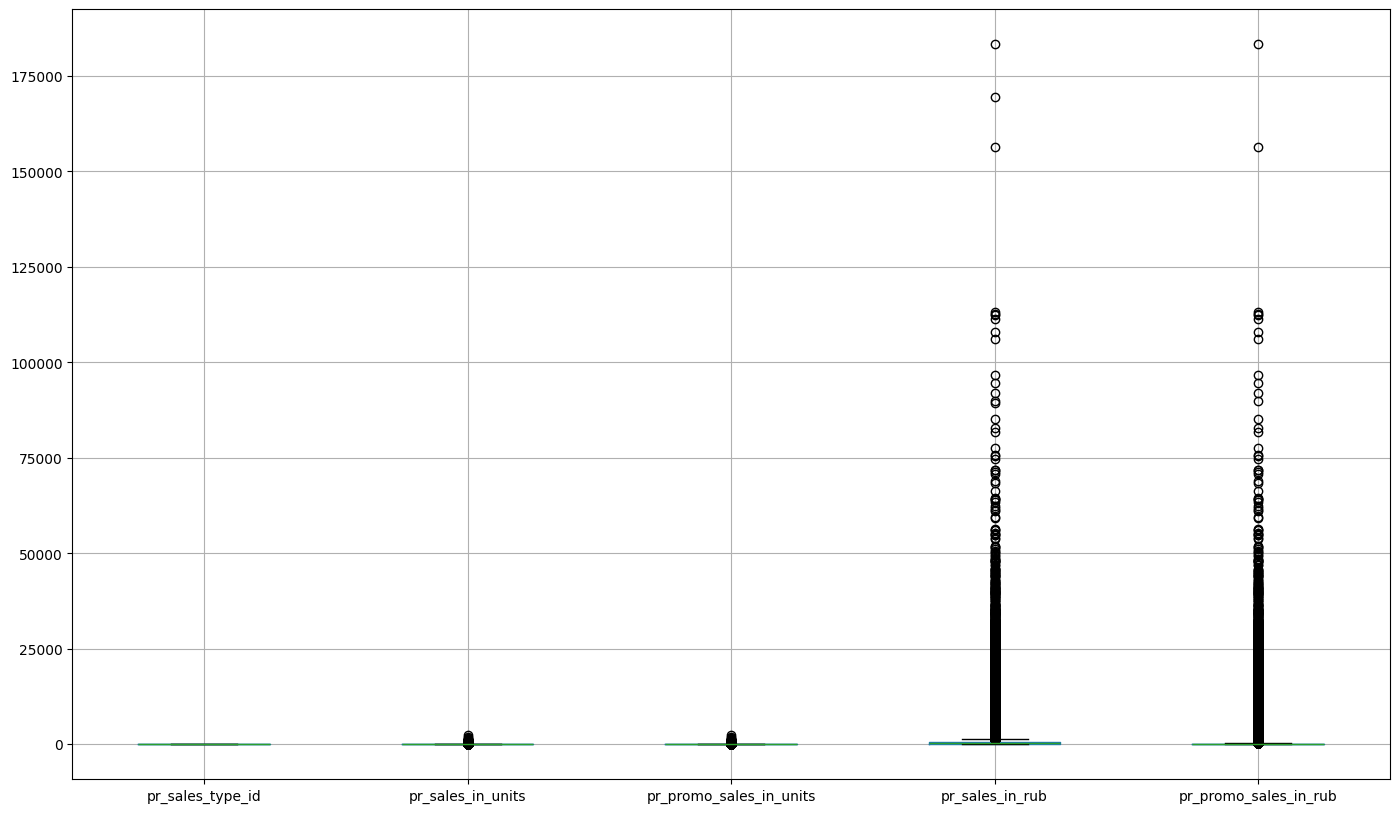

In [56]:
plt.figure(figsize=(17,10))
sales_df_train_1.boxplot()
plt.show()

В продажах явно есть выбросы. Пока удалим из данных столбцы о промо (в итоговых предсказаниях у нас нет указания на промо).

In [57]:
ratio_promo = round(len(sales_df_train_1[sales_df_train_1["pr_sales_type_id"] ==1])/len_train*100,2)
print(f' Доля промо в данных: {ratio_promo}%')

 Доля промо в данных: 37.01%


Однако столбцы promo_sales и pr_sales дублируют друг друга. Достаточно оставить только pr_sales и маркер было ли промо на товар.

In [58]:
sales_df_train_2 = sales_df_train_1.drop(columns = ['pr_promo_sales_in_units', 'pr_promo_sales_in_rub'])

#### 2.1.1 Анализ аномалий в продажах

In [59]:
sales_df_train_2['pr_sales_in_rub'].describe()

count    814881.000000
mean        640.105715
std        1634.419367
min           1.000000
25%         116.000000
50%         251.000000
75%         588.000000
max      183265.000000
Name: pr_sales_in_rub, dtype: float64

In [60]:
std_sales = sales_df_train_2['pr_sales_in_rub'].std()
mean_sales = sales_df_train_2['pr_sales_in_rub'].mean()
sales_big = sales_df_train_2[sales_df_train_2['pr_sales_in_rub'] > (mean_sales + 3*std_sales)]
sales_big.describe()

,date,pr_sales_type_id,pr_sales_in_units,pr_sales_in_rub
count,11240,11240.000000,11240.000000,11240.000000
mean,2023-02-08 00:06:39.715302656,0.680071,65.225178,10530.466548
min,2022-08-01 00:00:00,0.000000,4.000000,5545.000000
25%,2022-11-15 00:00:00,0.000000,30.000000,6625.750000
50%,2023-02-17 00:00:00,1.000000,49.000000,8251.000000
75%,2023-05-09 00:00:00,1.000000,78.000000,11618.250000
max,2023-07-18 00:00:00,1.000000,2348.000000,183265.000000
std,NaN,0.466469,76.993848,7594.053946


In [61]:
print(f"Количество строк с высокими продажами {len(sales_big)}, это {round(len(sales_big)/len_train * 100,2)}% от общего числа")

Количество строк с высокими продажами 11240, это 1.27% от общего числа


Проверим есть ли в высоких продажах какая-либо зависимость от даты:

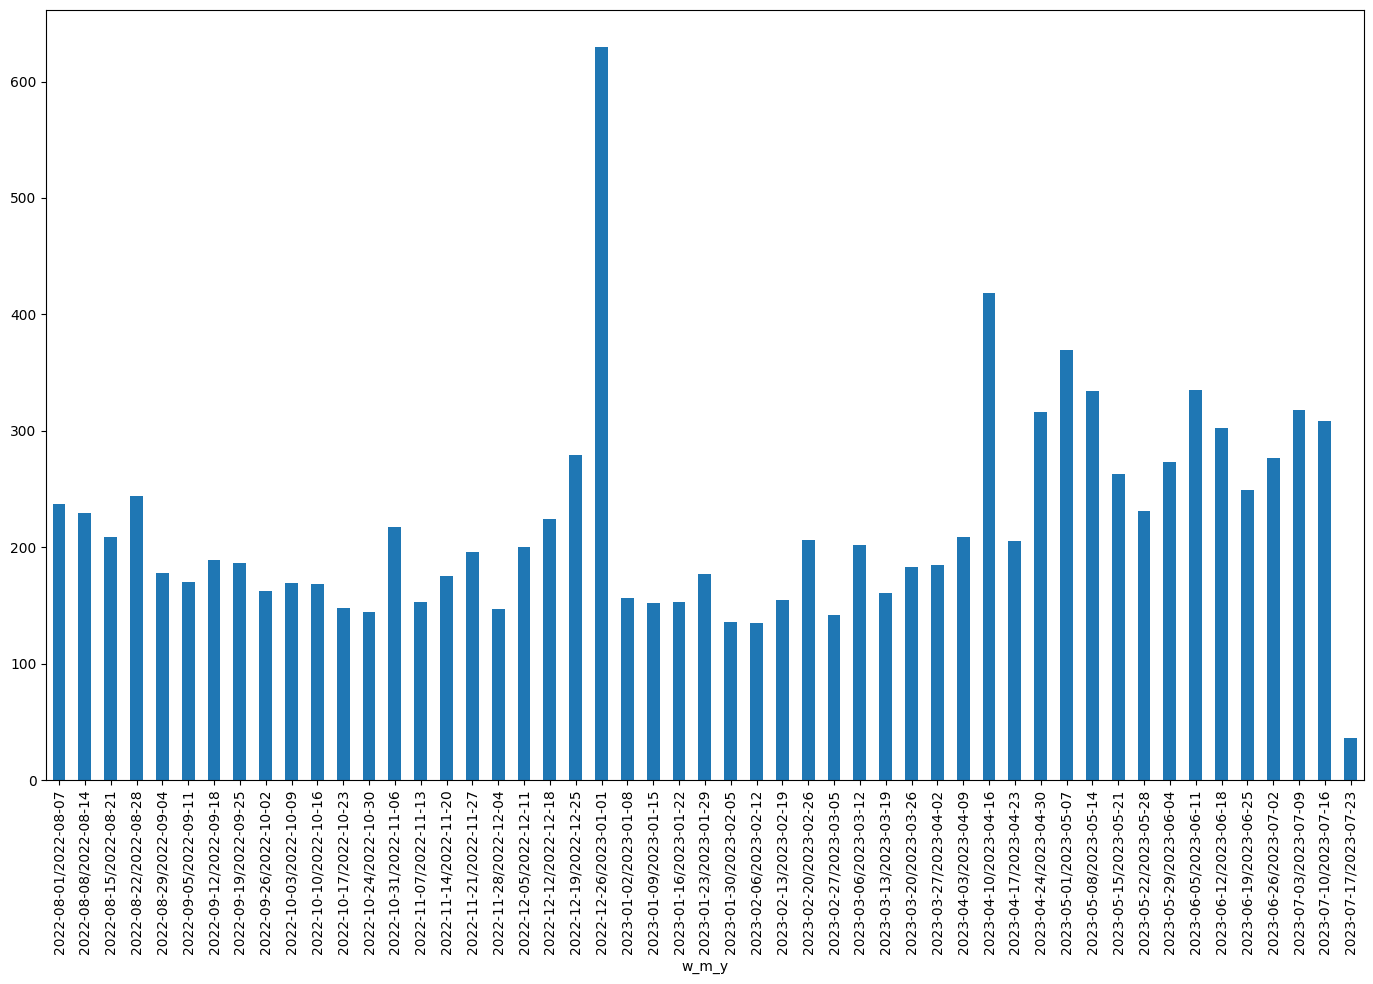

In [62]:
plt.figure(figsize=(17,10))
sales_big['w_m_y']= sales_big['date'].dt.to_period('W')
w_m_y_sales= sales_big.groupby('w_m_y')['pr_sales_in_rub'].count()
w_m_y_sales =w_m_y_sales.sort_index()
w_m_y_sales.plot(kind = 'bar')
plt.show()

Объяснить большое количество больших продаж в неделю после НГ можно, никто не хочет готовить.

In [63]:
sales_big[ sales_big['pr_sales_in_rub'] == sales_big['pr_sales_in_rub'].max()]

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_sales_in_rub,month_year,w_m_y
19116,42a0e188f5033bc65bf8d78622277c4e,8cad09283d1d6c5fb08daec8a576a72d,2023-03-21,1,440,183265.0,2023-03,2023-03-20/2023-03-26


Что-то явно произошло 21 апреля.

Так как данных о больших продажах немного - удалим их.

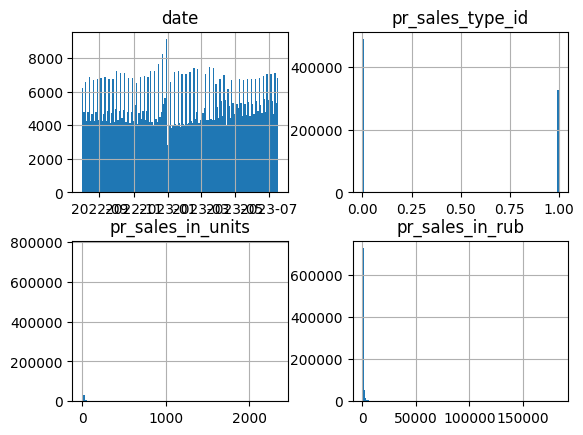

In [64]:
#sales_df_train_3 = sales_df_train_2[sales_df_train_2['pr_sales_in_rub'] < (mean_sales + 3*std_sales)]
sales_df_train_3 = sales_df_train_2.copy()
#sales_df_train_3 = sales_df_train_3[sales_df_train_2['pr_sales_in_rub']>0]
sales_df_train_3.hist(bins = 150)
plt.show()

Данные скошены вправо. Пока не будем фильтровать данные дальше. Возможно последушая кластеризация данных поможет получить более нормальное распределение в каждой группе.

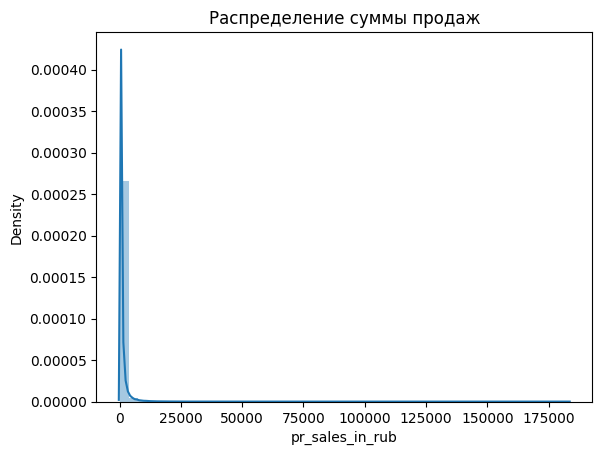

In [65]:
plt.title('Распределение суммы продаж')
sns.distplot(sales_df_train_3['pr_sales_in_rub'], bins=50);

#### 2.1.2 Анализ аномалий в количестве проданной продукции

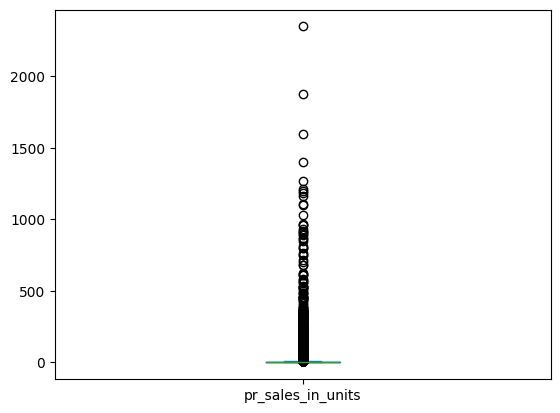

In [66]:
sales_df_train_3['pr_sales_in_units'].plot(kind = 'box')
plt.show()

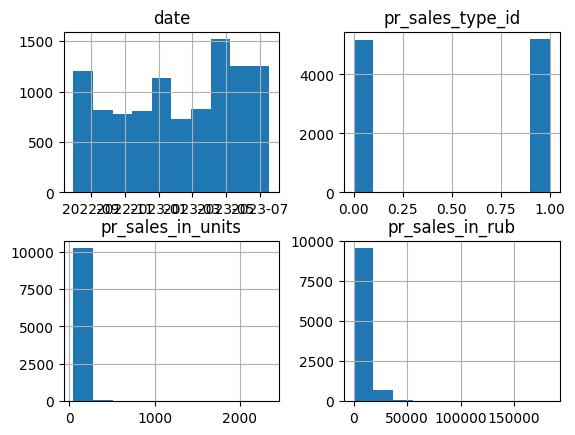

In [67]:
std_units = sales_df_train_3['pr_sales_in_units'].std()
mean_units = sales_df_train_3['pr_sales_in_units'].mean()
units_big = sales_df_train_3[sales_df_train_3['pr_sales_in_units'] > (mean_units + 3*std_units)]
units_big.hist()
plt.show()

In [68]:
print(f"Количество строк с высокими продажами {len(units_big)}, это {round(len(units_big)/len_train * 100,2)}% от общего числа")

Количество строк с высокими продажами 10343, это 1.17% от общего числа


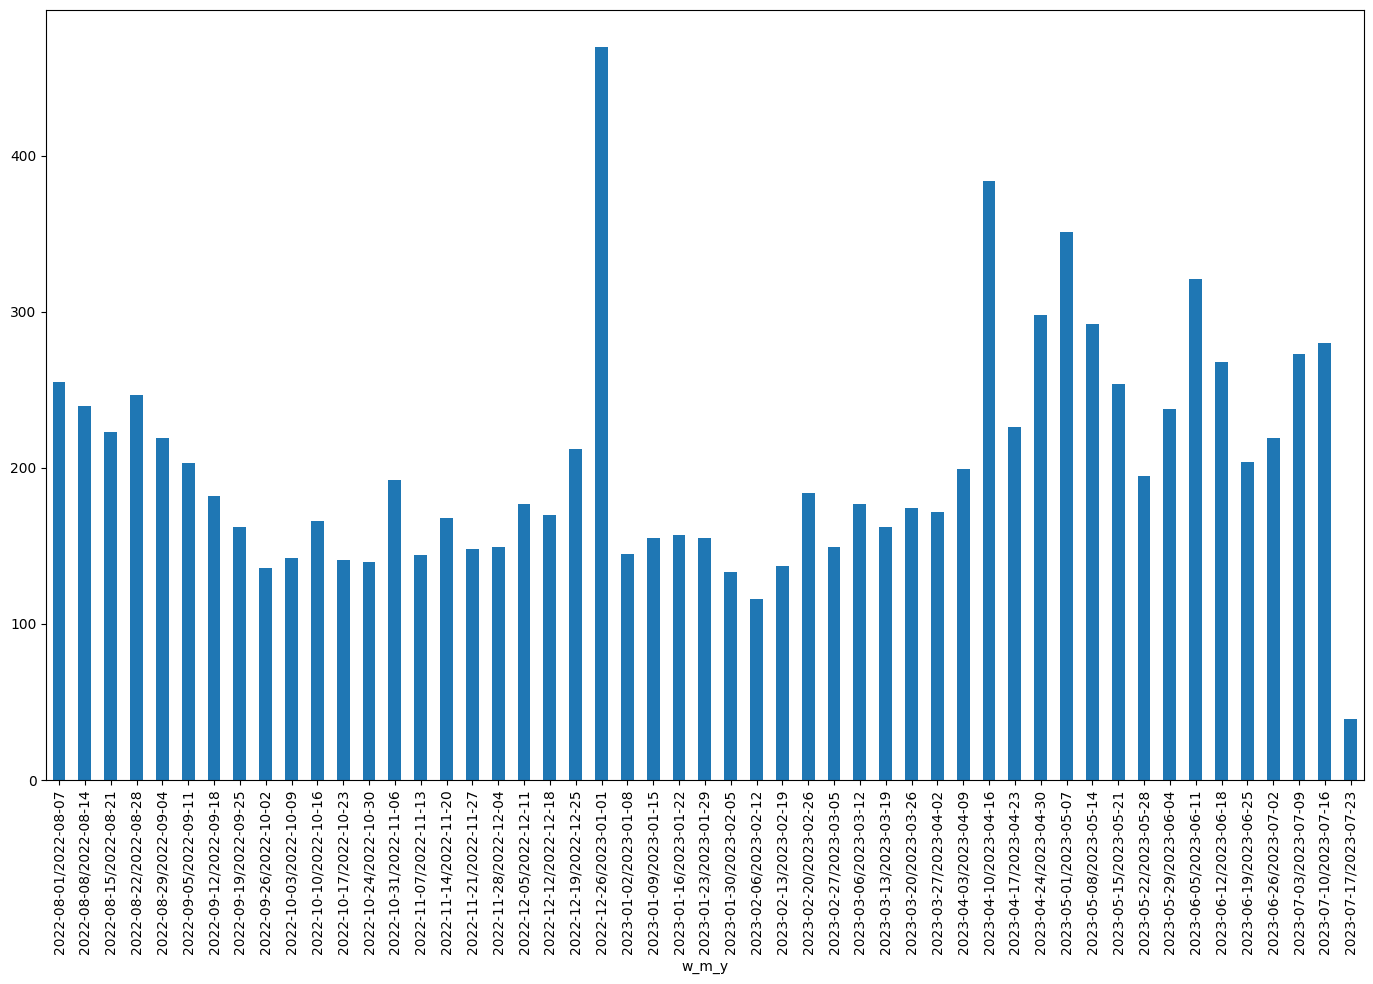

In [69]:
plt.figure(figsize=(17,10))
units_big['w_m_y']= units_big['date'].dt.to_period('W')
w_m_y_units= units_big.groupby('w_m_y')['pr_sales_in_units'].count()
w_m_y_units =w_m_y_units.sort_index()
w_m_y_units.plot(kind = 'bar')
plt.show()

Опять всплекс в новогоднюю неделю. Пока удалим большие продажи по количеству.

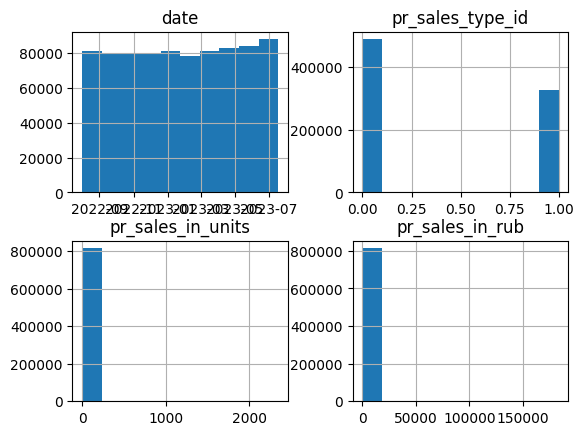

In [70]:
#sales_df_train_4 = sales_df_train_3[sales_df_train_3['pr_sales_in_units'] < (mean_units + 3*std_units)]
sales_df_train_4 = sales_df_train_3.copy()
sales_df_train_4.hist()
plt.show()

### 2.2 Проверка на явные дубликаты

In [71]:
sales_df_train_4[sales_df_train_4.duplicated()]

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_sales_in_rub,month_year


Дубликатов нет.

### 2.3 Выводы по разделу

UPD: анализ, проведенный в пункте 3.3 показал, что данные не имеют нормальное распределение. Следовательно правило трех сигм к данным не применимо, никакие выбросы не были удалены.
1. Видны выбросы в обучающем наборе данных о закрытых магазинах (0,08%).
2. Были удалены строки с отрицательными или нулевыми продажами (7.5%).
3. Были удалены столбцы, содержащие информацию о промо (так как она дублируется в столбцах продажа в рублях/ штуках).
4. Видны выбросы в продажах в рублях (1,36%).
5. Видны выбросы в units (1,73%).
6. Дубликатов не обнаружено.
6. Данные для дальнейшего использования sales_df_train_4.



## 3. EDA

Категориальные признаки:
- st_id – захэшированное id магазина;
- pr_sku_id – захэшированное id товара;
- pr_group_id – захэшированная группа товара;
- pr_cat_id – захэшированная категория товара;
- pr_subcat_id – захэшированная подкатегория товара;
- st_id – захэшированное id магазина;
- st_division_code id – захэшированное id дивизиона;
-st_type_format_id – id формата магазина;
-st_type_loc_id – id тип локации/окружения магазина;
-st_type_size_id – id типа размера магазина.

Дата:
- date – дата.

Булево:
- pr_sales_type_id – флаг наличия промо;
- pr_uom_id (маркер, обозначающий продаётся товар на вес или в ШТ);
-st_is_active – флаг активного магазина на данный момент.

Числовые:
- pr_sales_in_units – число проданных товаров без признака промо;
- pr_promo_sales_in_units – число проданных товаров с признаком промо;
- pr_sales_in_rub – продажи без признака промо в РУБ;
- pr_promo_sales_in_rub – продажи с признаком промо в РУБ.




### 3.1 Числовые переменные

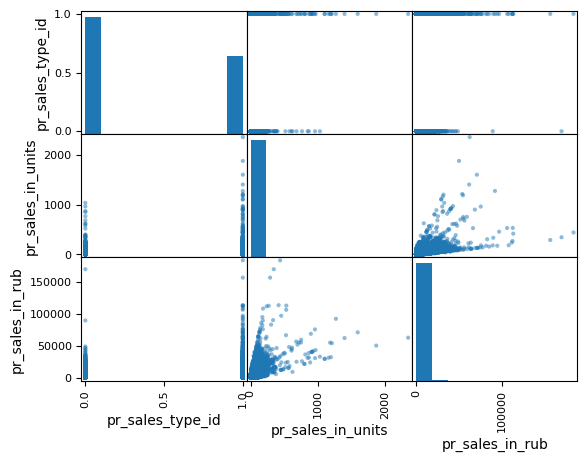

In [72]:
pd.plotting.scatter_matrix(sales_df_train_4)
plt.show()

Интересует зависимость суммы продаж от количества проданного.

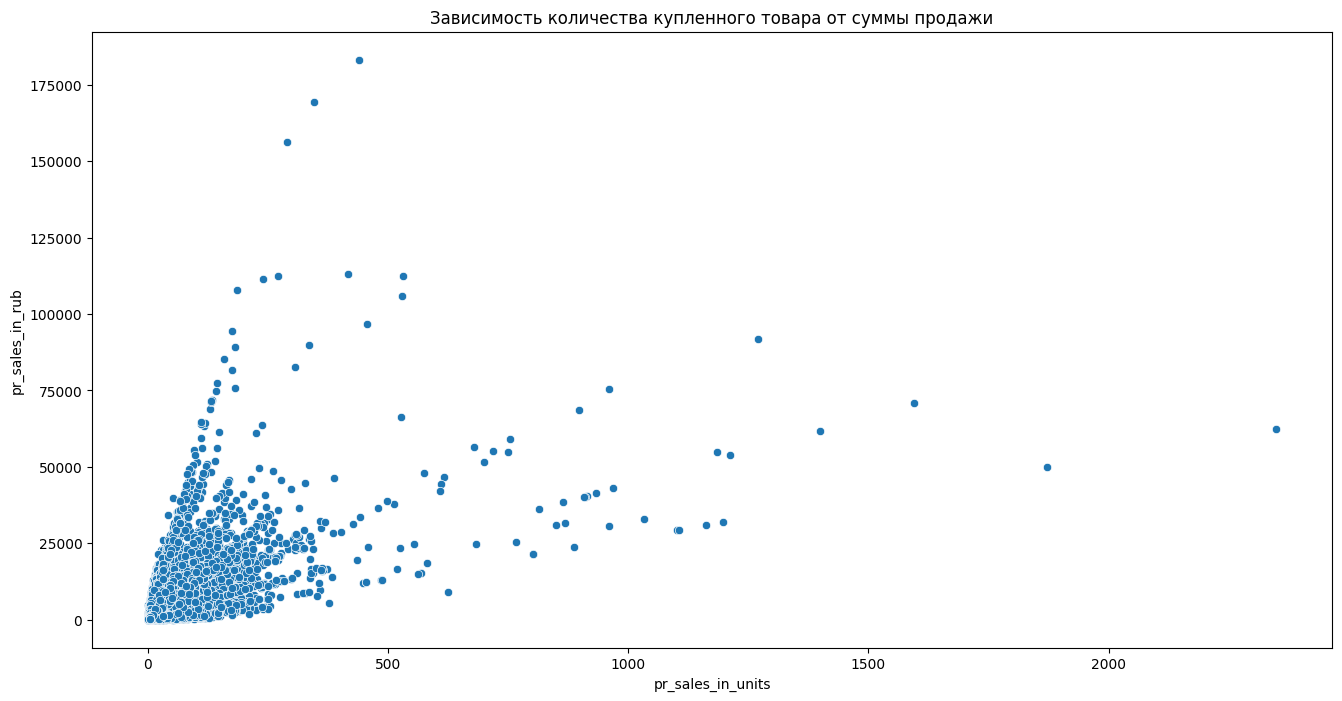

In [73]:
var ='pr_sales_in_rub'
f, ax = plt.subplots(figsize = (16,8))
fig = sns.scatterplot(x = 'pr_sales_in_units', y= var, data =sales_df_train_4)
plt.title('Зависимость количества купленного товара от суммы продажи')
plt.show()

Но в данных pr_sales_in_rub есть утечка таргета: проджа зависит от числа приобретенных товаров, а значит от 'pr_sales_in_units'.

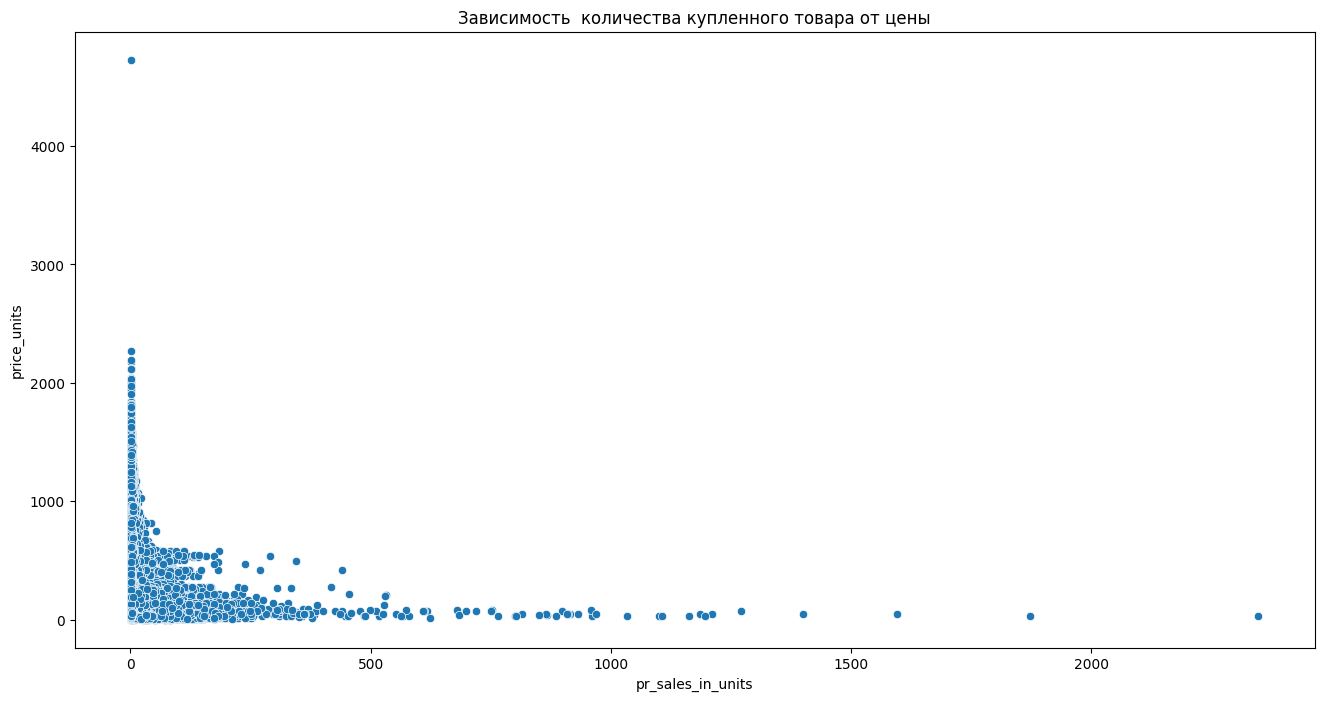

In [74]:
sales_df_train_4['price_units'] = sales_df_train_4['pr_sales_in_rub'] /sales_df_train_4['pr_sales_in_units']
var ='price_units'
f, ax = plt.subplots(figsize = (16,8))
fig = sns.scatterplot(x = 'pr_sales_in_units', y= var , data =sales_df_train_4)
plt.title('Зависимость  количества купленного товара от цены')
plt.show()

Во-первых, обнаружен выброс: это что за готовая продукция по цене выше 4500? Удалим выброс

In [75]:
#sales_df_train_4 = sales_df_train_4[sales_df_train_4['price_units']<4000]

Похоже на зависимость price= sales/units ~ 2500*exp(-units/7).
Тогда units ~ ln(price) Проверим это:

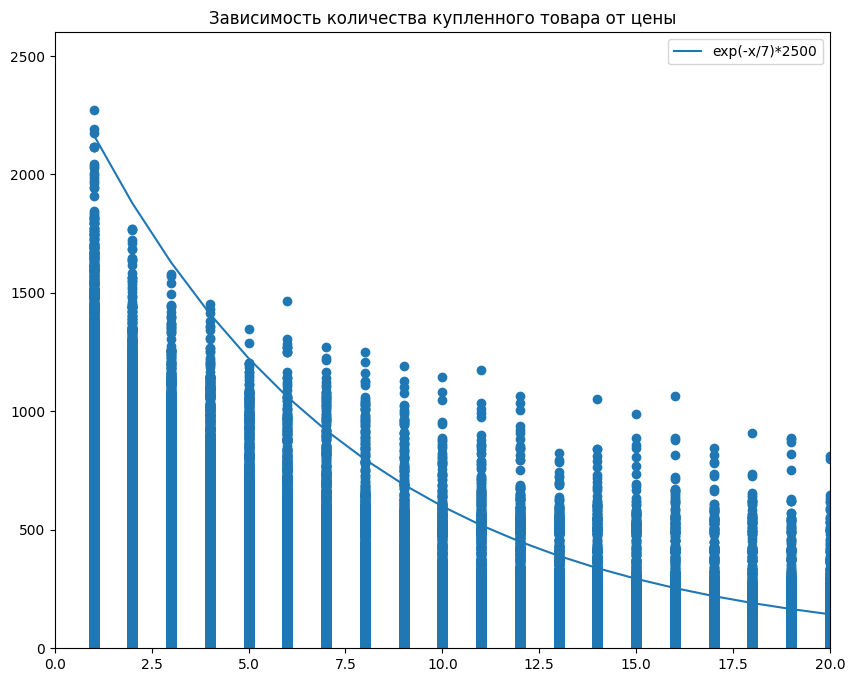

In [76]:
x =sales_df_train_4['pr_sales_in_units'].sort_values(ascending = True).unique()
y = np.exp(-x/7)*2500.
#pylab.subplot (1, 1, 2)
pylab.figure(figsize = [10,8])
pylab.plot(x, y,  label="exp(-x/7)*2500")
#y_mean = sales_df_train_4.groupby('pr_sales_in_units')['price_units'].mean()
pylab.scatter(sales_df_train_4['pr_sales_in_units'], sales_df_train_4['price_units'])
#pylab.plot(x, y_mean,  label="practice_data")
pylab.title ("Зависимость количества купленного товара от цены")
pylab.xlim([0,20])
pylab.ylim([0,2600])
pylab.legend()
pylab.show()

Можно сделать синтетический признак, предсказывающий цену по количеству проданного:price_pred ~ exp(-unions)

Остальные числовые признаки связаны с промо, а значит сейчас не рассматриваются.

In [77]:
sales_df_train_4.loc[:, 'price_pred'] = np.exp(-sales_df_train_4['pr_sales_in_units'])

In [78]:
sales_df_train_4.head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_sales_in_rub,month_year,price_units,price_pred
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5,825.0,2022-10,165.0,0.006738
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4,196.0,2023-01,49.0,0.018316
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1,78.0,2023-03,78.0,0.367879
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1,161.0,2023-02,161.0,0.367879
5,42a0e188f5033bc65bf8d78622277c4e,3474f0e025c7deb7e127a35763bc5512,2022-11-03,0,3,123.0,2022-11,41.0,0.049787


In [79]:
sales_df_train_4.columns

Index(['st_id', 'pr_sku_id', 'date', 'pr_sales_type_id', 'pr_sales_in_units',
       'pr_sales_in_rub', 'month_year', 'price_units', 'price_pred'],
      dtype='object')

### 3.2 Матрица корреляции и двухмерное отображение данных

In [80]:
# #correlation matrix

# corrmat = sales_df_train_4.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

Очень интересно, почему взятие логорифма у нас имеет линеную сильную корреляцию с ценой.

In [81]:
# cols = corrmat.nlargest(5, 'pr_sales_in_units')['pr_sales_in_units']
# print(cols)

Чтож данные объяснимы. Отрицательная корреляция у тех столбцов, рост которых понизит количество купленных товаров (что цена, что синтетический признак - дают отрицательную кореляцию).

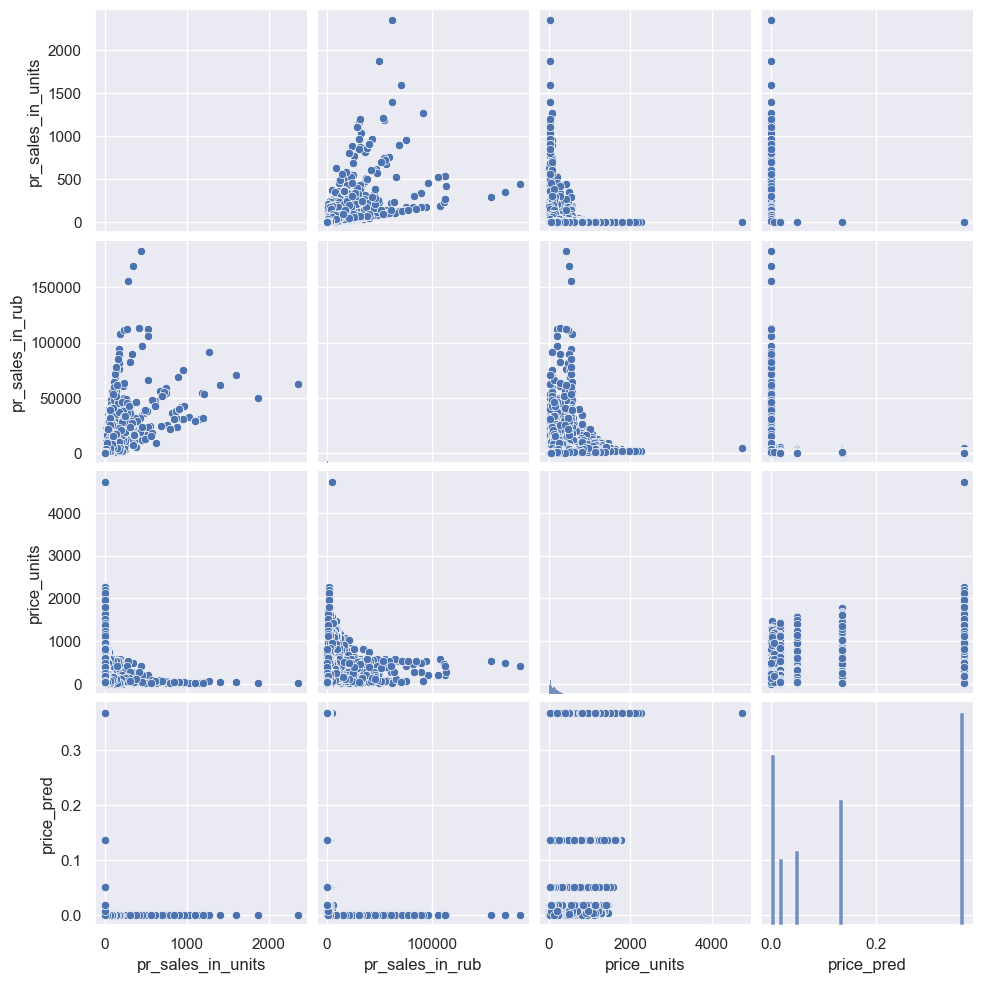

In [82]:
#scatterplot
sns.set()
sns.pairplot(sales_df_train_4[['pr_sales_in_units','pr_sales_in_rub','price_units', 'price_pred']], size = 2.5)
plt.show();

In [83]:
sales_df_train_4.columns

Index(['st_id', 'pr_sku_id', 'date', 'pr_sales_type_id', 'pr_sales_in_units',
       'pr_sales_in_rub', 'month_year', 'price_units', 'price_pred'],
      dtype='object')

### 3.3 Анализ на нормальность

#### 3.3.1 pr_sales_in_units (таргет)

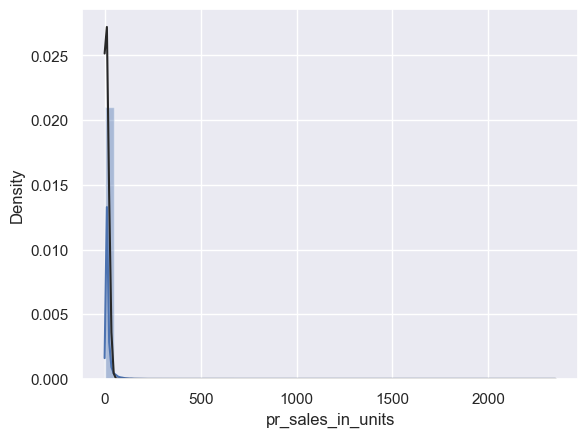

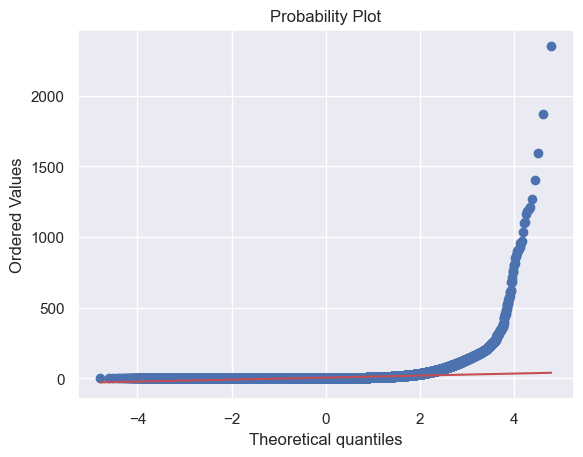

In [84]:
#histogram and normal probability plot
sns.distplot(sales_df_train_4['pr_sales_in_units'], fit=norm);
fig = plt.figure()
res = stats.probplot(sales_df_train_4['pr_sales_in_units'], plot=plt)

Таргет не является нормальным. Данные смещены вправо.
Логично, что данные больше нуля (это в том числе наша предыдушая обработка).

#### 3.3.2 pr_sales_in_rub

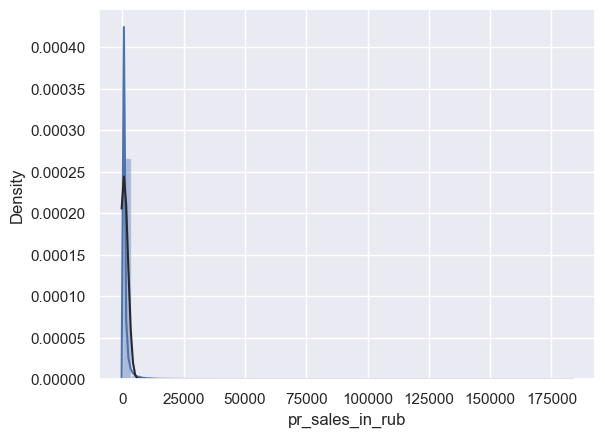

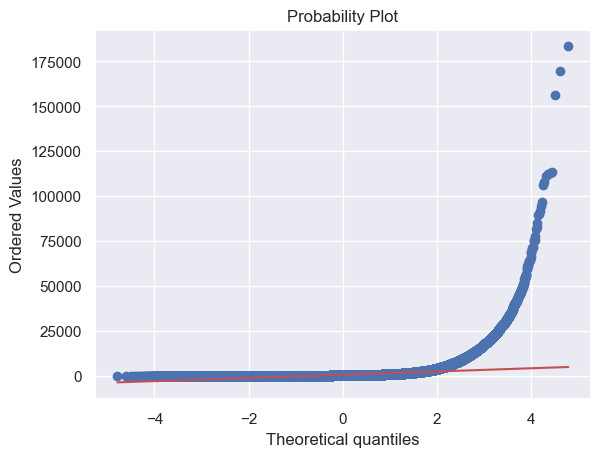

In [85]:
sns.distplot(sales_df_train_4['pr_sales_in_rub'], fit=norm);
fig = plt.figure()
res = stats.probplot(sales_df_train_4['pr_sales_in_rub'], plot=plt)

#### 3.3.3 price_units

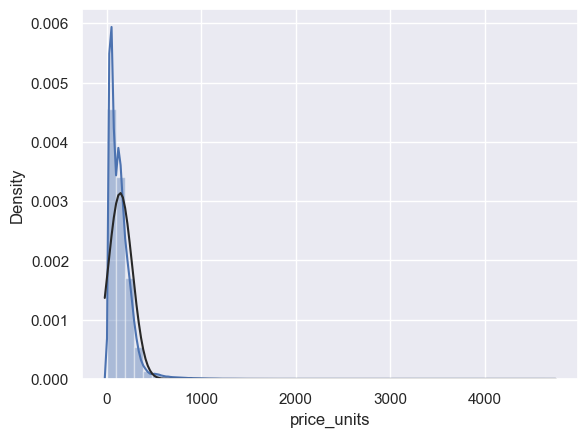

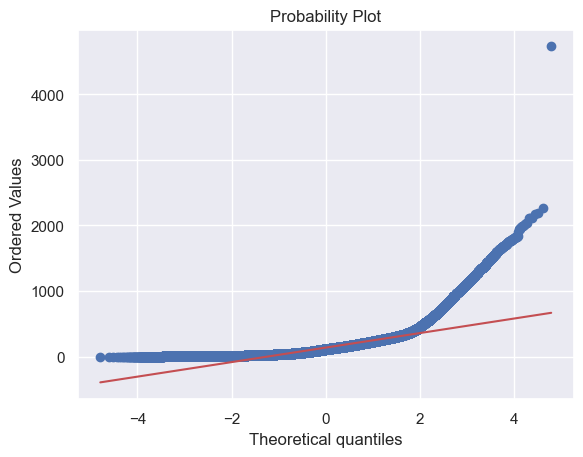

In [86]:
sns.distplot(sales_df_train_4['price_units'], fit=norm);
fig = plt.figure()
res = stats.probplot(sales_df_train_4['price_units'], plot=plt)

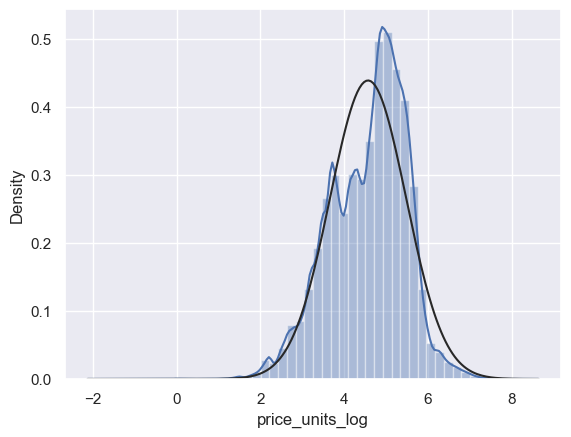

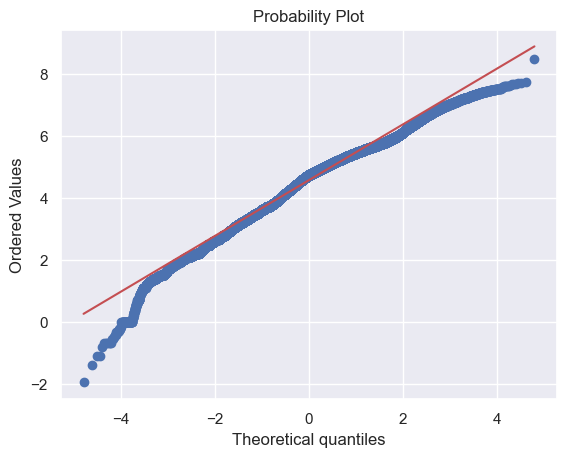

In [87]:
sales_df_train_4['price_units_log'] = np.log(sales_df_train_4['price_units'])
sns.distplot(sales_df_train_4['price_units_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(sales_df_train_4['price_units_log'], plot=plt)

Лучше не стало.

### 3.4 Категориальные признаки

Категориальные признаки:

- st_id – захэшированное id магазина;
- st_city_id - город магазина
- pr_sku_id – захэшированное id товара;
- pr_group_id – захэшированная группа товара;
- pr_cat_id – захэшированная категория товара;
- pr_subcat_id – захэшированная подкатегория товара;
- st_id – захэшированное id магазина;
- st_division_code id – захэшированное id дивизиона;
- st_type_format_id – id формата магазина;
- st_type_loc_id – id тип локации/окружения магазина;
- st_type_size_id – id типа размера магазина.

In [88]:
sales_df_train_5 = pd.merge(sales_df_train_4, st_df, how='left', left_on='st_id', right_on='st_id')
sales_df_train_5 = pd.merge(sales_df_train_5, pr_df, how='left', left_on='pr_sku_id', right_on='pr_sku_id')

Для удобства анализа преобразуем id с помощью OridinalEncoder

In [89]:
num_features = sales_df_train_5.select_dtypes(exclude='object').columns.to_list()
cat_features =list(set(sales_df_train_5.columns)- set(num_features))

sales_df_train_6 = sales_df_train_5.copy()


enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(sales_df_train_6[cat_features])
sales_df_train_6[cat_features]= enc.transform(sales_df_train_6[cat_features])
sales_df_train_6[cat_features] = is_it_int(sales_df_train_6[cat_features])

Можно преобразовать в int столбец pr_sku_id


##### Сохранить энкодер

In [90]:
dump(enc, 'enc.bin', compress=True)

['enc.bin']

In [91]:
enc_2=load('enc.bin')

проверка

In [92]:
sales_df_train_6.iloc[0]['st_id']

7.0

In [93]:
sales_df_train_5.iloc[0]['st_id']

'c81e728d9d4c2f636f067f89cc14862c'

In [94]:
x = sales_df_train_5.iloc[:1]
y = x.copy()
y[cat_features] = enc_2.transform(x[cat_features])
y

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_sales_in_rub,month_year,price_units,price_pred,price_units_log,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,7.0,1542.0,2022-10-20,1,5,825.0,2022-10,165.0,0.006738,5.105945,2.0,2.0,1,1,8,1,5.0,4.0,145.0,1


##### продолжение

In [95]:
sales_df_train_6.head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_sales_in_rub,month_year,price_units,price_pred,price_units_log,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,7.0,1542,2022-10-20,1,5,825.0,2022-10,165.0,0.006738,5.105945,2.0,2.0,1,1,8,1,5.0,4.0,145.0,1
1,3.0,780,2023-01-29,0,4,196.0,2023-01,49.0,0.018316,3.891820,4.0,3.0,1,1,12,1,8.0,2.0,67.0,17
2,2.0,240,2023-03-02,0,1,78.0,2023-03,78.0,0.367879,4.356709,2.0,2.0,2,1,28,1,8.0,36.0,58.0,17
3,1.0,1780,2023-02-17,0,1,161.0,2023-02,161.0,0.367879,5.081404,5.0,0.0,1,2,8,1,8.0,22.0,4.0,1
4,3.0,361,2022-11-03,0,3,123.0,2022-11,41.0,0.049787,3.713572,4.0,3.0,1,1,12,1,8.0,2.0,141.0,17


#### 3.4.1 Анализ группировки данных по данным магазина

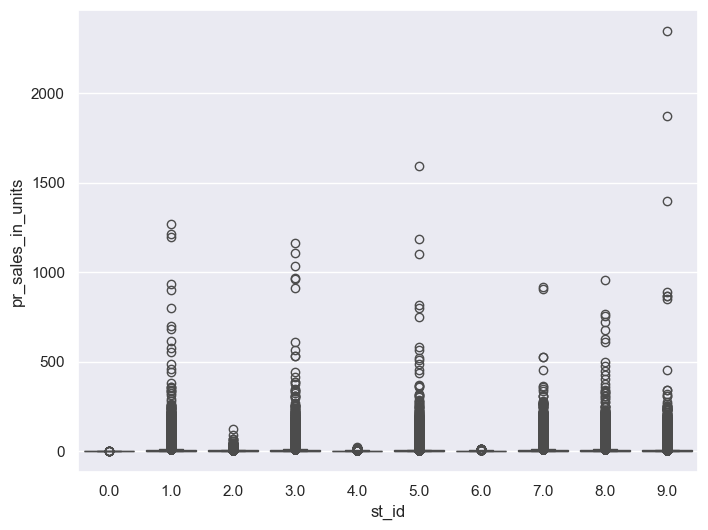

In [96]:
var = 'st_id'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="pr_sales_in_units", data=sales_df_train_6)

- Видно, что 2,3,5,9  - можно объединить в один класс.
- 1,8 - в один класс.
- 7 магазин похож на 4,5, но имеет большую медиану.
- 0, 4,6 -  непохожи на другие магазины.

In [97]:
sales_df_train_6['st_id_group'] =  sales_df_train_6['st_id'].apply(st_id_group)
sales_df_train_6['st_id_group'].value_counts()

st_id_group
0    380612
1    258059
2    176210
Name: count, dtype: int64

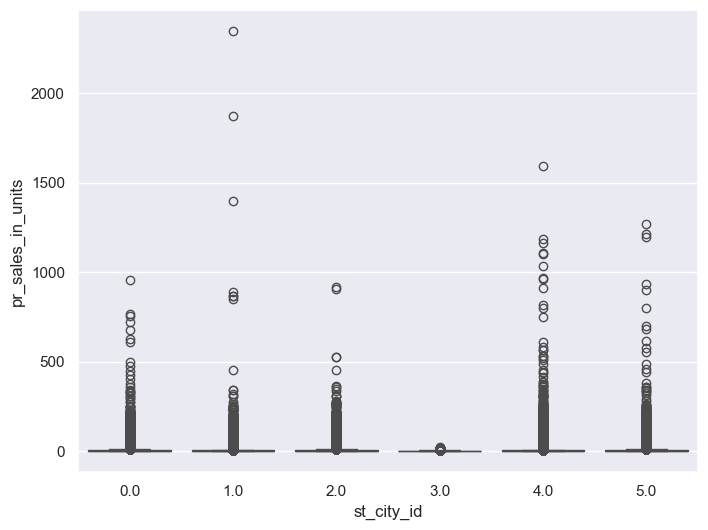

In [98]:
var = 'st_city_id'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="pr_sales_in_units", data=sales_df_train_6)

- Видно, что 1,4 - можно объединить в один класс.
- 0, 2,5 - в один класс.

In [99]:
sales_df_train_6['st_city_id_group'] =  sales_df_train_6['st_city_id'].apply(st_city_id_group)
sales_df_train_6['st_city_id_group'].value_counts()

st_city_id_group
1    468938
0    334452
2     11491
Name: count, dtype: int64

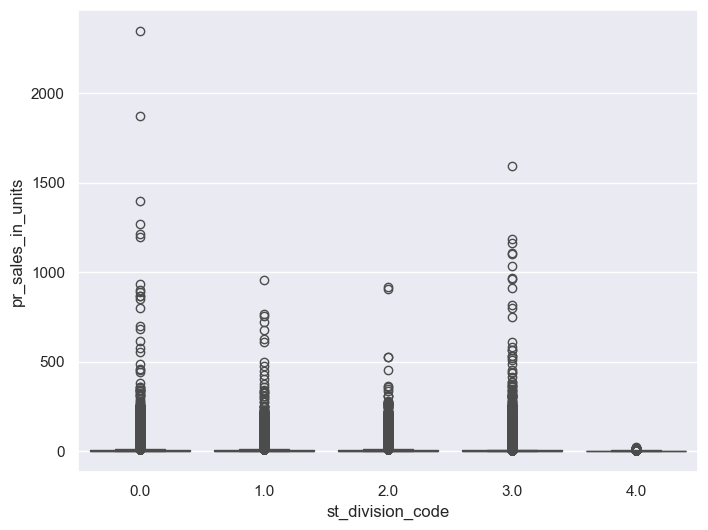

In [100]:
var = 'st_division_code'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="pr_sales_in_units", data=sales_df_train_6)

- 1,2 - в один класс
- 0, 3 в один класс

In [101]:
sales_df_train_6['st_division_id_group'] =  sales_df_train_6['st_division_code'].apply(st_division_id_group)
sales_df_train_6['st_division_id_group'].value_counts()

st_division_id_group
1    478350
0    325040
2     11491
Name: count, dtype: int64

In [102]:
st_group = sales_df_train_6.groupby(['st_id_group', 'st_city_id_group', 'st_division_id_group'])['st_id'].nunique()
st_group

st_id_group  st_city_id_group  st_division_id_group
0            0                 1                       3
             1                 0                       1
1            1                 0                       1
                               1                       1
2            1                 0                       2
             2                 2                       2
Name: st_id, dtype: int64

В целом можем просто добавить единственный признак - группировка по данным о магазинах ( учитывая id магазина, город и дивизион - мы можем дать магазину конкретный сборный класс).

In [103]:
# Группируем данные по данным о магазинах( общая групировка)
sales_df_train_7 = st_group_(sales_df_train_6, st_group)
sales_df_train_7['st_group'].value_counts()

st_group
0.0    334452
4.0    164719
3.0    143898
2.0    114161
1.0     46160
5.0     11491
Name: count, dtype: int64

In [104]:
st_group2 = sales_df_train_7.groupby(['st_group'])['st_type_format_id', 'st_type_loc_id',	'st_type_size_id'].agg(['nunique', 'mean'])
st_group2

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

- Группа 0 и 2 похожи по признакам (формат, размер, локация).
- 1,3 чистые классы.
- 4 - поход на 0,2 но есть часть других размеров.
- 5 класс - содержит различия в типе размера данных.

#### 3.4.2 Анализ группировки данных по группе товаров

In [ ]:
cat_features2 = cat_features.copy()
cat_features2 =cat_features2 +['st_id_group',  'st_city_id_group',  'st_division_id_group', 'st_group']
cat_features2

In [ ]:
var = 'pr_group_id'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="pr_sales_in_units", data=sales_df_train_7)


Всего 9 категорий товаров.
1,5,7,8 похожи.
0,2, 3,4,6 - не похожи на другие группы.

In [ ]:
sales_df_train_7['pr_group_id_group'] =  sales_df_train_7['pr_group_id'].apply(pr_group_id_group)
sales_df_train_7['pr_group_id_group'].value_counts()

In [ ]:
cat_features3 = cat_features.copy()
cat_features3 =cat_features2 +['pr_group_id_group']

In [ ]:
for i in sales_df_train_7['pr_group_id_group'].unique():

      var = 'pr_subcat_id'
      data =sales_df_train_7[sales_df_train_7['pr_group_id_group']==i]
      print(data.groupby([var])['pr_sales_in_units'].agg(['median', 'count']))
      #f, ax = plt.subplots(figsize=(8, 8))
      #fig = sns.boxplot(x=var, y="pr_sales_in_units", data=sales_df_train_7[sales_df_train_7['pr_group_id_group']==i])

Ничего непонятно, но очень интересно. Оставим пока эти данные непреобразованными.
Зависимость от товаров тоже посмотреть не удасться, видов товаров более 2000.

Посмотрим на распределение штучных/весовых товаров.

In [ ]:
sales_df_train_7.groupby(['pr_uom_id'])['pr_sales_in_units'].agg(['mean', 'median', 'count'])

Кажется разницы в количестве между весовым товаром и невесовым -небольшая (условно не 1 шт и 100 грамм).

In [ ]:
sales_df_train_7[cat_features] = enc.inverse_transform(sales_df_train_7[cat_features])

### Вывод
Числовые признаки:
1. Добавлен признак price: продажи/количество проданных товаров.
3. Также добавлен признак: ln(price).
4. Высокая корреляция у pr_sales_in_rub и таргета (что логично, если много потратили, наверное много купили).
5. price_units и sales_union_log имеют отрицательную корреляцию (рост цены - падение спроса).

Числовые признаки стоит проверить на линейных моделях.

Категориальные данные:
1. Из данных о магазинах сгруппировали объекты по магазину, городу и дивизиону - выделили 6 классов.
2. Сгруппировали данные по группе товаров - получили 6 классов.

## 4. Формирование новых признаков

### 4.1 Формирование признаков даты

In [ ]:
# Вытащим день недели, год, месяц, день
sales_df_train_7 = year_month_week(sales_df_train_7)

In [ ]:
#Добавим маркер праздника
holidays_covid_calendar['date'] = pd.to_datetime(holidays_covid_calendar['date'])
holidays_calendar = holidays_covid_calendar[holidays_covid_calendar['holiday'] ==1]
sales_df_train_7['holiday'] = 0
sales_df_train_7.loc[sales_df_train_7['date'].isin(list(holidays_calendar['date'])), 'holiday'] = 1
sales_df_train_7['holiday'].value_counts()

In [ ]:
cat_features4 =cat_features3 +['holiday', 'year', 'month', 'week','day']

### 4.2 ТОП продаваемых товаров

In [ ]:
day_all = (sales_df_train_7['date'].max()-sales_df_train_7['date'].min())
day_all

In [ ]:
top_pr_sku_id = sales_df_train_7.groupby(['pr_sku_id'])['date'].nunique().sort_values(ascending =False)
top_pr_sku_id.hist(bins = 50)
plt.show()

разделим данные на категории:
- Ликвидные: покупались каждый день
- Неликвидные: менее 50 дней
- Оставшиеся  

In [ ]:
sales_df_train_7['liquidity'] = 0
sales_df_train_7.loc[sales_df_train_7['pr_sku_id'].isin(list((top_pr_sku_id>350).index)), 'liquidity'] = 2
sales_df_train_7.loc[sales_df_train_7['pr_sku_id'].isin(list((top_pr_sku_id>50).index)), 'liquidity'] = 1

### 4.3 Оборачиваемость магазина

In [ ]:
top_st_revenue = sales_df_train_7.groupby('st_id')['pr_sales_in_units'].sum().sort_values(ascending = False)
top_st_revenue

In [ ]:
top_st_revenue.plot(kind = 'box')

In [ ]:
sales_df_train_7['top_st_revenue'] = 0
sales_df_train_7.loc[sales_df_train_7['top_st_revenue'].isin(list((top_st_revenue>400000).index)), 'top_st_revenue'] = 2
sales_df_train_7.loc[sales_df_train_7['top_st_revenue'].isin(list((top_st_revenue>100000).index)), 'top_st_revenue'] = 1

In [ ]:
cat_features5 =cat_features4 +['liquidity','top_st_revenue']

### 4.4 Кластеризация товаров

In [ ]:
sales_df_train_7.columns


**Исходные:**

Числовые:
- 'pr_sales_in_units'- количество купленного товара (таргет)
- 'pr_sales_in_rub' - сумма продаж товара в день (таргет)

Категориальные
- 'st_id' -номер магазина
-'pr_sku_id' - номер товара
-'date' - дата продажи
- 'pr_sales_type_id' - промо или нет
- 'st_city_id' - город
- 'st_division_code' - дивизион
- 'st_type_format_id'- формат магазина
- 'st_type_loc_id' - локация
- 'st_type_size_id' -размер
- 'st_is_active' - открыт ли магазин
- 'pr_group_id' - группа товаров
-'pr_cat_id' - категория
-'pr_subcat_id' - субкатегория
- 'pr_uom_id' - весовой/штучный

Новые признаки:

Числовые:
 - 'price_units' - цена(таргет)
 -  price_pred - цена предсказанная по количеству купленного товара
 - 'price_units_log' - чтобы получить нормальное распределение цены

Категориальные:

- 'st_id_group' - группа похожих магазинов (в зависимости от количества проданного товара
- 'st_city_id_group' - группа городов (в зависимости от количества проданных товаров)
- 'st_division_id_group' - группа дивизионов
- 'st_group' группировка по признакам  st_id_group,  st_city_id_group, st_division_id_group
- pr_group_id_group - группа товаров на основе продаж этих товаров
-'holiday' - праздник ли это
-'year' - год продажи
- 'month' месяц продажи
- 'week' день недели
-'day' день
- 'liquidity' - ликвидность (топ продаваемых товаров проданы каждый день, менее 50 дней, серединка)
- 'pr_group_id_group' - группа товаров
- 'month_year' - месяц_год


Отберем столбцы для кластеризации

In [ ]:
columns_for_cluster = ['pr_sku_id', 'pr_sales_in_units', 'price_units','liquidity', 'pr_cat_id', 'pr_uom_id']
sales_df_train_8 = sales_df_train_7[columns_for_cluster]
sales_df_train_8.head(5)

In [ ]:
categorical = ['liquidity','pr_cat_id', 'pr_uom_id']
numeric = list(set(columns_for_cluster) - set(categorical) - set(['pr_sku_id']))

Воспользуемся Ohe кодированием

In [ ]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(sales_df_train_8[categorical])
sales_df_train_8_ohe = sales_df_train_8.copy()
sales_df_train_8_ohe[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(sales_df_train_8_ohe[categorical])
sales_df_train_8_ohe = sales_df_train_8_ohe.drop(categorical, axis=1)
len(sales_df_train_8_ohe.columns)

In [ ]:
scaler = StandardScaler()
sales_df_train_8_ohe[numeric] = scaler.fit_transform(sales_df_train_8_ohe[numeric])
sales_df_train_8_ohe.head(5)

In [ ]:
sales_df_train_9_ohe = sales_df_train_8_ohe.groupby('pr_sku_id').agg( 'median')

In [ ]:
# Кластеризуем данные
sil, db = Kmeans_K(sales_df_train_9_ohe,750, 800,10)

In [ ]:
label, s, d, kmeans_cente = kmeans_k_known(sales_df_train_9_ohe, 800)

In [ ]:
sales_df_train_9_ohe['cluster_kmean'] = label

In [ ]:
cluster_CustomerID = []
sales_df_train_10 = sales_df_train_7.copy()
for i in range(len(label)):
    cluster_CustomerID.append(sales_df_train_9_ohe[sales_df_train_9_ohe['cluster_kmean'] == i].index)
    sales_df_train_10.loc[sales_df_train_10['pr_sku_id'].isin(list(cluster_CustomerID[i])), 'cluster_kmean'] = i
sales_df_train_10.head()

### 4.6 Кластеризация товаров (иеархический анализ)

In [ ]:
link = hierarchy(sales_df_train_9_ohe.drop(columns = 'cluster_kmean', axis = 1), 100)

In [ ]:
labes_i = fcluster(link, 10, criterion='distance')
s= metrics.silhouette_score(sales_df_train_9_ohe.drop(columns = 'cluster_kmean', axis = 1), labes_i, metric='euclidean')
d = metrics.davies_bouldin_score(sales_df_train_9_ohe.drop(columns = 'cluster_kmean', axis = 1), labes_i)
print(f'Значение метрик для 20 кластеров:\n silhouette_score={round(s,3)}\n davies_bouldin_score={round(d,3)}')

kmean справился явно лучше

### 4.7 Кластеризация магазинов

In [ ]:
columns_for_cluster_2 = ['st_id', 'pr_sales_in_units', 'liquidity','top_st_revenue',
                         'pr_sales_in_rub', 'st_city_id','st_type_format_id', 'st_type_loc_id','st_type_size_id' , 'st_division_code' ]
cluser_st = sales_df_train_7[columns_for_cluster_2]
cluser_st.head(5)

In [ ]:
categorical_2 = ['st_city_id','st_type_format_id', 'st_type_loc_id','st_type_size_id','st_division_code' ]
numeric_2 = list(set(columns_for_cluster_2) - set(categorical_2) - set(['st_id']))

In [ ]:
encoder_ohe_2 = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder_ohe_2.fit(cluser_st[categorical_2])
cluser_st_ohe = cluser_st.copy()
cluser_st_ohe[encoder_ohe_2.get_feature_names_out()] = encoder_ohe_2.transform(cluser_st_ohe[categorical_2])
cluser_st_ohe = cluser_st_ohe.drop(categorical_2, axis=1)
len(cluser_st_ohe.columns)

In [ ]:
scaler = StandardScaler()
cluser_st_ohe[numeric_2] = scaler.fit_transform(cluser_st_ohe[numeric_2])
cluser_st_ohe.head(5)

In [ ]:
cluser_st_ohe_2 = cluser_st_ohe.groupby('st_id').agg( 'median')
cluser_st_ohe_2

In [ ]:
# Кластеризуем данные
sil_2, db_2 = Kmeans_K(cluser_st_ohe_2,2, 10,1)

Ну явно можно выделить 6 кластеров, попробуем посмотреть что они включают

In [ ]:
label, s, d, kmeans_cente = kmeans_k_known(cluser_st_ohe_2, 6)

In [ ]:
cluser_st_ohe_2['cluster_st'] = label

In [ ]:
cluster_CustomerID = []
for i in range(len(label)):
    cluster_CustomerID.append(cluser_st_ohe_2[cluser_st_ohe_2['cluster_st'] == i].index)
    sales_df_train_10.loc[sales_df_train_10['st_id'].isin(list(cluster_CustomerID[i])), 'cluster_st'] = i
sales_df_train_10.head()

In [ ]:
sales_df_train_10.groupby('cluster_st')[['st_id', 'st_group']].agg(['nunique'])

### 4.8 Выводы по разделу:

1. Сформированые признаки даты: год, месяц, день продажи, отметка - был ли в этот день праздник.
2. Топ продоваемых товаров -  разделили данные на категории:
    - Ликвидные: покупались каждый день
    - Неликвидные: менее 50 дней
    - Оставшиеся.
Анализ проводился на основе ящика с усами и гистограмм.  
3. Оборачиваемость магазина:
    - Магазины, продавшиее за исследуемый промежуток более 400000 единиц товара.
    - Магазины, продавшиее за исследуемый промежуток более 100000 единиц товара.
    - Оставшиеся.
Анализ проводился на основе ящика с усами и гистограмм.  
4. Кластеризация товаров с помощью метода kmeans. Удалось достичь метрик кластеризации и выделить классов 800 кластеров. Кластеризация товаров с помощью иеархического анализа дала значение метрки хуже.
5. Кластеризация магазинов с помощью метода kmeans. Удалось достичь метрик кластеризации и выделить классов 6 кластеров.
**Анализ получившихся признаков и их влияние на качество модели.**
Проанализировав, получившиеся метрки на разном количестве признаков с помощью модели lgbm и важности признаков, получили:
- разработанные признаки не повышали качество модели.
- необходима кластеризация по временным рядам.


## 5 Анализ группировки вокруг магазинов/товаров/кластеров

Всего 2005 видов товара.

In [ ]:
sales_df_train_11 = sales_df_train_10.groupby('st_id')['pr_sku_id'].agg(['count', 'nunique'])
sales_df_train_11['freq'] = sales_df_train_11['count']/sales_df_train_11['nunique']
sales_df_train_11

В разрезе магазина и вида товара предсказать не получиться, есть магазины продаюшие малое количество товаров и имеющее мало видов товаров.
Посмотрим что будет в группировке на столбцев st_group

In [ ]:
sales_df_train_12 = sales_df_train_10.groupby('st_group')['pr_sku_id'].agg(['count', 'nunique'])
sales_df_train_12['freq'] = sales_df_train_12['count']/sales_df_train_12['nunique']
sales_df_train_12

Уже лучше. А что будет если воспользуемся cluster_kmean

In [ ]:
sales_df_train_13 = sales_df_train_10.groupby('st_group')['cluster_kmean'].agg(['count', 'nunique'])
sales_df_train_13['freq'] = sales_df_train_13['count']/sales_df_train_13['nunique']
sales_df_train_13

In [ ]:
sales_df_train_14 = sales_df_train_10.groupby('cluster_st')['cluster_kmean'].agg(['count', 'nunique'])
sales_df_train_14['freq'] = sales_df_train_14['count']/sales_df_train_14['nunique']
sales_df_train_14

In [ ]:
sales_df_train_10.to_csv('train_cluster_2.csv')

Кажется все лучше и лучше. Попробуем на обучение все варианты.

Эти данные были поданы на вход модели lgbm.
Дальнейший анализ работы модели (lgbm) показал, что добавленые признаки кластеризации товаров и магазинов не принес уменьшение ошибки, в отличие от кластеризации по временным рядам, проведеннной в пункте 6.

##  6 Кластеризация временных рядов

### 6.1 Формирование датасета товар-магазин

In [ ]:
train = sales_df_train.copy()
TimeSeries_df = ts_st_sku(sales_df_train)
TimeSeries_df.head(5)

### 6.2 Kmean для временных рядов

In [ ]:
tickers_scaled = Kmeans_ts(TimeSeries_df, 20,"euclidean")

In [ ]:
data_cluster, centers = kmeans_st_pred(TimeSeries_df, 8,'euclidean' )
plt.figure(figsize=(12,8))
for cluster_number in range(8):
    plt.plot(centers[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [ ]:
  sales_df_train_10['st_id_pr_sku_id'] = sales_df_train_10['st_id']+sales_df_train_10['pr_sku_id']
  sales_df_train_10['cluster_st'] = sales_df_train_10['st_id_pr_sku_id'].apply(give_cluster_ts)

In [ ]:
sales_df_train_10.head(5)

In [ ]:
sales_df_train_10.to_csv('train.csv')

In [ ]:
sales_df_train_10.columns

### 6.3 Формирование признаков кластер временного ряда + сдвиги+ скользящее среднее

In [ ]:
data_all_df_2 = mada_log(sales_df_train_10)

## 7. Формирование обучающих/ тестовых данных

In [ ]:
pr_df = pd.read_csv('pr_df.csv')
sales_df_train = pd.read_csv('sales_df_train.csv')
sales_submission = pd.read_csv('sales_submission.csv')
st_df = pd.read_csv('st_df.csv')
holidays_covid_calendar = pd.read_csv('holidays_covid_calendar.csv')

### 7.1 train

In [ ]:
train = sales_df_train.copy()
train = pd.merge(train, st_df, how='left', left_on='st_id', right_on='st_id')
train = pd.merge(train, pr_df, how='left', left_on='pr_sku_id', right_on='pr_sku_id')

In [ ]:
%%time
# долго считает
train_, data_cluster = make_features_train(train, 8, 'euclidean', holidays_covid_calendar)

In [ ]:
train_.to_csv('train_.csv')

In [ ]:
train_.head()

### 7.2 test

In [ ]:
test_ = sales_submission.copy()
test_.columns = test_.columns.str.replace('target', 'pr_sales_in_units')
test_ = pd.merge(test_, st_df, how='left', left_on='st_id', right_on='st_id')
test_ = pd.merge(test_, pr_df, how='left', left_on='pr_sku_id', right_on='pr_sku_id')

test_ = make_features_test(test_, data_cluster, holidays_covid_calendar, train)

In [ ]:
test_.shape

In [ ]:
sales_submission.shape

In [ ]:
test_.to_csv('test_.csv')

## 8. Обучение модели

In [ ]:
#train_ = pd.read_csv('train_.csv')
#test_ = pd.read_csv('test_.csv')

Сформируем фичи и таргет для теста (саму структуру)

In [ ]:
features_test =  test_.drop(columns = ['pr_sales_in_units',  'date',  'st_is_active'], axis = 1)
target_test = test_['pr_sales_in_units']


Сформируем фичи и таргет для обучающих данных

In [ ]:
#features = train_.drop(columns = ['pr_sales_in_units', 'pr_sales_in_rub', 'price_units', 'price_pred', 'price_units_log', 'date', 'month_year'], axis = 1)
features = train_.drop(columns = ['pr_sales_in_units', 'pr_sales_in_rub',  'date',  'st_is_active'], axis = 1)
target = train_['pr_sales_in_units']
features.columns

Выделим категориальные признаки

In [ ]:
#cat_features6 = cat_features5+ data_all_df.select_dtypes(include='object').columns.to_list() + ['cluster_st']
cat_features6 = features.select_dtypes(include='object').columns.to_list()+ ['cluster_st'] + ['year', 'month', 'week', 'day','holiday', 'liquidity', 'top_st_revenue']
#cat_features6 = list(set(cat_features6) + set(['year', 'month', 'week', 'day','holiday', 'liquidity', 'top_st_revenue']))
cat_features6

In [ ]:
pd.DataFrame(cat_features6).to_csv('cat_features6.csv', index=False)

In [ ]:
cat_features6 = pd.read_csv('cat_features6.csv')

### 8.1 CatBoostRegressor

In [ ]:
#%%time
#parameters = {'cat_features' :[cat_features6]}
#model_cat = find_best(CatBoostRegressor, 5,features, target, parameters, True)

In [ ]:
#predict = model_cat.best_estimator_.predict(features)
#wape(target, predict)

Посчитали на другом пк. Результат хуже, чем у LGBM. В последствии оставили только LGBM.

### 8.2 LGBMRegressor

In [ ]:
%%time
parameters = {}
# Эти параметры проверялись
#parameters = {
#    'learning_rate':[0.03,0.1],
#    'num_leaves': [ 257, 521],
#    'n_estimators': [None,   200, 300],
#    'max_depth' : [None, 10]
#    }
#Эти были лучшие
parameters = {
    'learning_rate':[0.03],
    'num_leaves': [521],
    'n_estimators': [300]
   }

features[cat_features6] = features[cat_features6].astype('category')
model_cat = find_best(LGBMRegressor, 5,features, target, parameters, False)

In [ ]:
model_best, importance_model, w  = model_result(model_cat, features, features.columns)

Модель LGBM дает лучшие результаты, чем кэтбуст. Остановимся на данном типе модели. В следушем пункте, обучим ее предсказывать на каждый день: 14 дней - 14 моделей.

## 9. Обучение модели предсказания на каждый день

In [ ]:
#Загружаем данные
pr_df = pd.read_csv('pr_df.csv')
sales_df_train = pd.read_csv('sales_df_train.csv')
sales_submission = pd.read_csv('sales_submission.csv')
st_df = pd.read_csv('st_df.csv')
holidays_covid_calendar = pd.read_csv('holidays_covid_calendar.csv')


In [ ]:
models_day, wape_day, data_cluster = train_model_day(sales_df_train, st_df, pr_df,holidays_covid_calendar)

In [ ]:
data_cluster.to_csv('data_cluster.csv')

In [ ]:
for i in range(14):
    filename = 'model_lgbm_{}.sav'.format(i)
    models_day[i].booster_.save_model(filename)

In [ ]:
model_info = pd.DataFrame()
model_info['model'] = models_day
model_info['wape_day'] = wape_day
model_info


In [ ]:
wape_day

## 10. Подготовка итогового sales_submission

In [ ]:
#Загружаем данные
pr_df = pd.read_csv('pr_df.csv')
sales_df_train = pd.read_csv('sales_df_train.csv')
sales_submission = pd.read_csv('sales_submission.csv')
st_df = pd.read_csv('st_df.csv')
holidays_covid_calendar = pd.read_csv('holidays_covid_calendar.csv')
data_cluster = pd.read_csv('data_cluster.csv')

In [ ]:
#Загружаем модели
models_day = []
for i in range(1, 15):
      filename = 'model_lgbm_{}.sav'.format(i)
      model = lightgbm.Booster(model_file=filename)
      models_day.append(model)


In [ ]:
sales_submission_out = predict_days(models_day, data_cluster,sales_df_train,  sales_submission, st_df, pr_df,holidays_covid_calendar)

In [ ]:
sales_submission_out['target'].describe()

In [ ]:
sales_submission_out.to_csv('sales_submission_out.csv')

In [ ]:
sales_submission_out.head()

## Подготовка собственного файла submission

In [ ]:
sales_submission_our = make_submission_file(sales_df_train)
sales_submission_our

# Результаты работы.

**Цель исследования:** предсказать количество проданной продукции собственного изготавления для формирования объема подготавливаемого заказчиком товара.

**Задачи исследования:**
1. Анализ имеющихся данных
2. Предобработка данных.
3. Выявление аномалий и дубликатов.
4. EDA.
5. Формирование новых признаков.
6. Анализ получившихся признаков и их влияние на качество модели.
7. Кластеризация временных рядов.
8. Формирование тестовых и обучающиъ наборов данных.
9. Обучение моделей: выбор типа модели.
10. Обучение 14 моделей, предсказывающих количество товара на каждый день.
11. Получение итогового предсказания модели.

**Анализ данных.**

Всего 4 файла данных.
- st_df с информацией о магазинах.
- sales_df_train с набором обучающих данных.
- pr_df с информацией о товарах (группа/категория/субкатегория)
- sales_submission для формирования конечного результата.

1) Пропусков в данных нет.

2) В обучающих данных всего 12 магазинов, 1991 товар. Есть тип данных float, который содержит целочисленные значения - столбцы приведены к типу данных 'int'. Столбец date привден к формату datetime.

3) В данных о товарах содержится информация о 2050 товарах, групп -  9, категорий - 43, субкатегорий - 170, 2 метки: развес или по штучно.
Все логично. Больше всего значений в id товара, дальше по уменьшению количества уникальных значений и укрупнению класса(товар-подкатегория-категория-группа).

4) В данных о магазинах есть информация о двух закрывшихся магазинах, их также нет в данных результата. Доля информации о закрытых магазинах в обучающих данных менее 0,08%.

5) столбцы с promo дублируют информацию с обычных столбцов продаж, если промо было в этот день, если не было - 0. Решено использовать только столбцы без указания промо, но оставить столбец с флагом - было ли промо в этот день.
6)  в один день в одном магазине на один товар могут быть продажи с акцией и без.
7) не все товары, имеющиеся в таблице pr_df есть в обучающих данных:sales_df_train. Некоторые товары есть в sales_submission, но их нет в sales_df_train.

**Предобработка данных.**

Анализ, проведенный в пункте 3.3 показал, что данные не имеют нормальное распределение. Следовательно правило трех сигм к данным не применимо, никакие выбросы не были удалены.
1. Видны выбросы в обучающем наборе данных о закрытых магазинах (0,08%).
2. Были удалены строки с отрицательными или нулевыми продажами (7.5%).
3. Были удалены столбцы, содержащие информацию о промо (так как она дублируется в столбцах продажа в рублях/ штуках).
4. Видны выбросы в продажах в рублях (1,36%).
5. Видны выбросы в units (1,73%).
6. Дубликатов не обнаружено.

**EDA.**
Числовые признаки:
1. Добавлен признак price: продажи/количество проданных товаров.
3. Также добавлен признак: ln(price).
4. Высокая корреляция у pr_sales_in_rub и таргета (что логично, если много потратили, наверное много купили).
5. price_units и sales_union_log имеют отрицательную корреляцию (рост цены - падение спроса).
6. Данные не имеют нормального распределения.

Категориальные данные:
1. Из данных о магазинах сгруппировали объекты по магазину, городу и дивизиону - выделили 6 классов.
2. Сгруппировали данные по группе товаров - получили 6 классов.

**Формирование новых признаков.**

1. Сформированые признаки даты: год, месяц, день продажи, отметка - был ли в этот день праздник.
2. Топ продоваемых товаров -  разделили данные на категории:
    - Ликвидные: покупались каждый день
    - Неликвидные: менее 50 дней
    - Оставшиеся.
Анализ проводился на основе ящика с усами и гистограмм.  
3. Оборачиваемость магазина:
    - Магазины, продавшиее за исследуемый промежуток более 400000 единиц товара.
    - Магазины, продавшиее за исследуемый промежуток более 100000 единиц товара.
    - Оставшиеся.
Анализ проводился на основе ящика с усами и гистограмм.  
4. Кластеризация товаров с помощью метода kmeans. Удалось достичь метрик кластеризации: индекс Дэвиса-Булдина 0.28,  коэффициент силуэта 0.45 и выделить  800 кластеров. Кластеризация товаров с помощью иеархического анализа дала значение метрки хуже.
5. Кластеризация магазинов с помощью метода kmeans. Удалось достичь метрик кластеризации: индекс Дэвиса-Булдина 0.5, коэффициент силуэта 0,38 и выделить  6 кластеров.
**Анализ получившихся признаков и их влияние на качество модели.**

Проанализировав, получившиеся метрки на разном количестве признаков с помощью модели lgbm и важности признаков, получили:
- разработанные признаки не повышали качество модели.
- необходима кластеризация по временным рядам.

**Кластеризация временных рядов.**

- Временные ряды, получали в срезе товар-магазин. В данном случае учитывались только данные без акций.
- Методом kmean кластеризовали ряды, получили значение метрики силуэта 0.65 и выделили 8 кластеров.
- На основе кластера сформировали доп. признаки: сдвиг ( от 1 до 28 дней) и скользящее среднее на 28 дней.
- На основе кластера выделили тренд и сезонность.

**Формирование тестовых и обучающиъ наборов данных.**

Разработали функции для подготовки признаков данных: отдельно для обучающих и тестовых данных.
Признаки, оставленные в итоговой версии:

'st_id', 'pr_sku_id', 'pr_sales_type_id', 'st_city_id',
       'st_division_code', 'st_type_format_id', 'st_type_loc_id',
       'st_type_size_id', 'pr_group_id', 'pr_cat_id', 'pr_subcat_id',
       'pr_uom_id', 'st_id_pr_sku_id', 'cluster_st', 'year', 'month', 'week',
       'day', 'holiday', 'liquidity', 'top_st_revenue', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10',
       'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17',
       'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24',
       'lag_25', 'lag_26', 'lag_27', 'lag_28', 'rolling_mean', 'trend',
       'seasonal'.
       

**Обучение моделей: выбор типа модели.**

В ввиду ограниченности по времени, было исследовано всего два типа модели:
кэтбуст и lgbm.

Лучший результат и скорость работы показала модель lgbm, в дальнейшем этот тип модели и обучали для каждого дня.
Полученый в ходе кросс-валидации (5 блоков) wape для каждой модели 0.404(5)

Также было принято решение для каждого дня предсказания обучать отдельную модель, настраивая параметры таким образом, чтобы каждая моедль могла обобщать имеющиеся данные на 1,2 ... дня вперед. Для реализации этой возможности для каждого нового дня модель обучалась на меньшем количестве столбцов сдвига.
- 1 день: lag_1.....lag_28
- 2 день: lag_2....lag_28 (так как информации о предыдушем дне нет).
- ...
- 14 день: lag_14...lag_28.

Также была рассмотрена модель prophet, она давала хороший скор, но для предсказания в разрезе магазин-товар или кластер. Использование этой модели позволило бы повысить метрику, но необходимость предсказывать на 14 дней вперед потребывало как минимум обучение и настройку 14*8 моделей (на каждый день в разрезе кластера). Временные ресурсы и доступные мощности не позволили нам сделать это.

**Получение итогового предсказания модели.**

Подготовлено 2 функции:
1. Обучение 14 моделей по имеющимся данным.
Входные данные:
sales_df_train - обучающие данные.
st_df - информация о магазинах.
pr_df - информация о товарах.
holidays_covid_calendar - информация о праздниках.
2. Генерация предсказаний и запись их в таблицу.
Входные данные:
model_best - лучшая модель на каждый день, получены с помощью предыдущей функции.
sales_df_train - обучающие данные.
sales_submission - выходные данные, предсказания в разрезе день, магазин, товар (возможно предсказание только на 14+ дней от последнего дня в датасете sales_df_train).
st_df - информация о магазинах.
pr_df - информация о товарах.
holidays_covid_calendar - информация о праздниках.

**Возможности для масштабирования:**
- функции построены таким образом, что при каждом формировании фич обучающего набора проводится новая кластеризация с учетом новой информации, количество получаемых кластеров можно менять.
- при получении итогового предсказания модели обучаются заново, что позволяет каждый раз подавать новый датасет с новыми данными.

**Точки роста:**
- протестировать большее количество моделей разного типа.
- для каждого дня попробывать обучать модели разного типа и выбрать лучшую.
- организовать лучший тип кросс-валидации с учетом времени.
- кластеризовать временные ряды не только по изменению количества проданных товаров, но и по цене товаров (динамика цены) и по объему продаж. Возможно
это бы дало дополнительную информацию.
- внедрить модели для прогнзирования временных рядов, оценить изменение метрики.
- добавить фичи из библиотеки tsfresh.